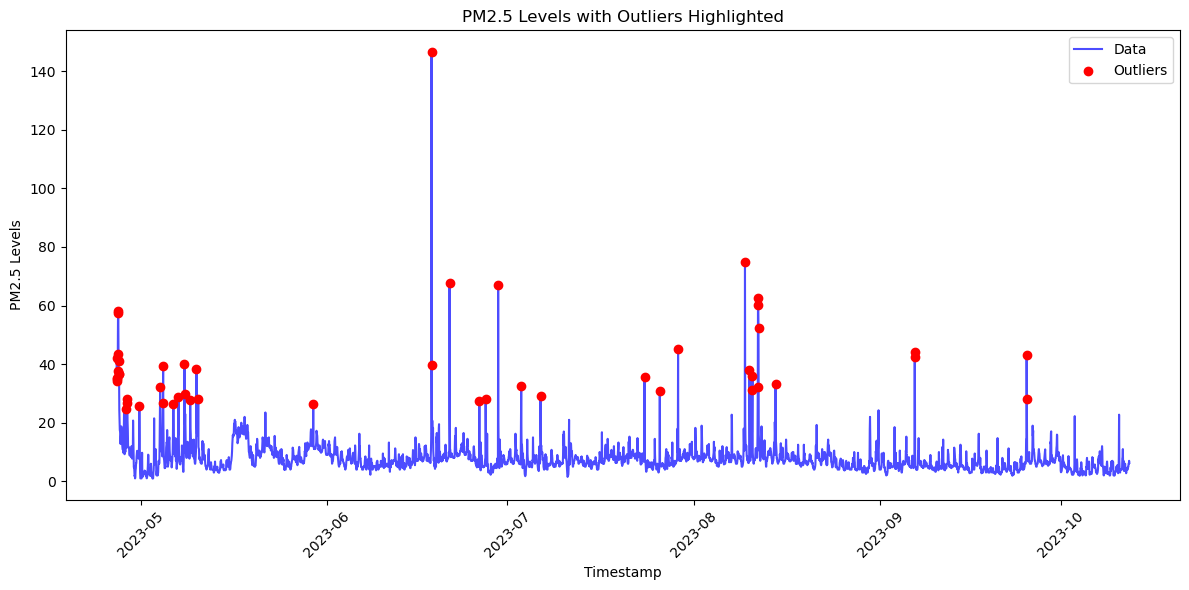

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'pm25_data.csv' with your dataset file)
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Assuming PM2.5 data is in a column named 'PM2.5'
pm25_column = 'PM2.5 (ug/m3)'

# Calculate the Z-Score for each data point
df['Z-Score'] = (df[pm25_column] - df[pm25_column].mean()) / df[pm25_column].std()

# Define a threshold for detecting outliers
threshold = 3  # Z-Score > 3 or < -3 indicates an outlier

# Identify outliers
df['Outlier'] = (df['Z-Score'].abs() > threshold)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot all data points
plt.plot(df.index, df[pm25_column], label='Data', color='blue', alpha=0.7)

# Highlight outliers in red
plt.scatter(
    df.index[df['Outlier']],
    df[pm25_column][df['Outlier']],
    color='red',
    label='Outliers',
    zorder=5,
)

# Add titles and labels
plt.title('PM2.5 Levels with Outliers Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Levels')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()




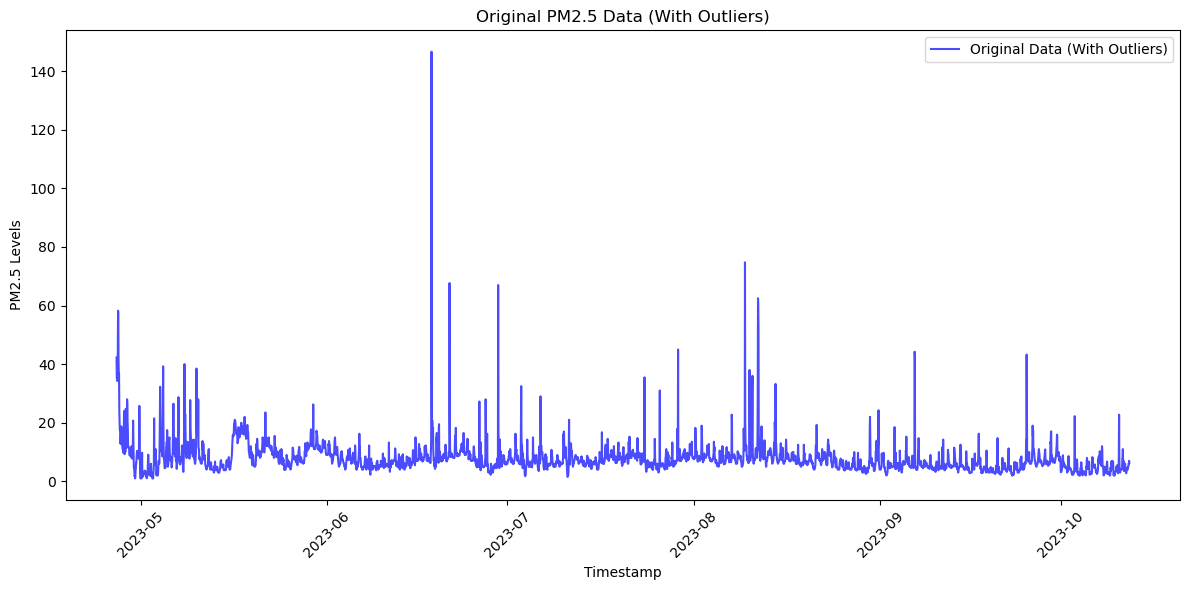

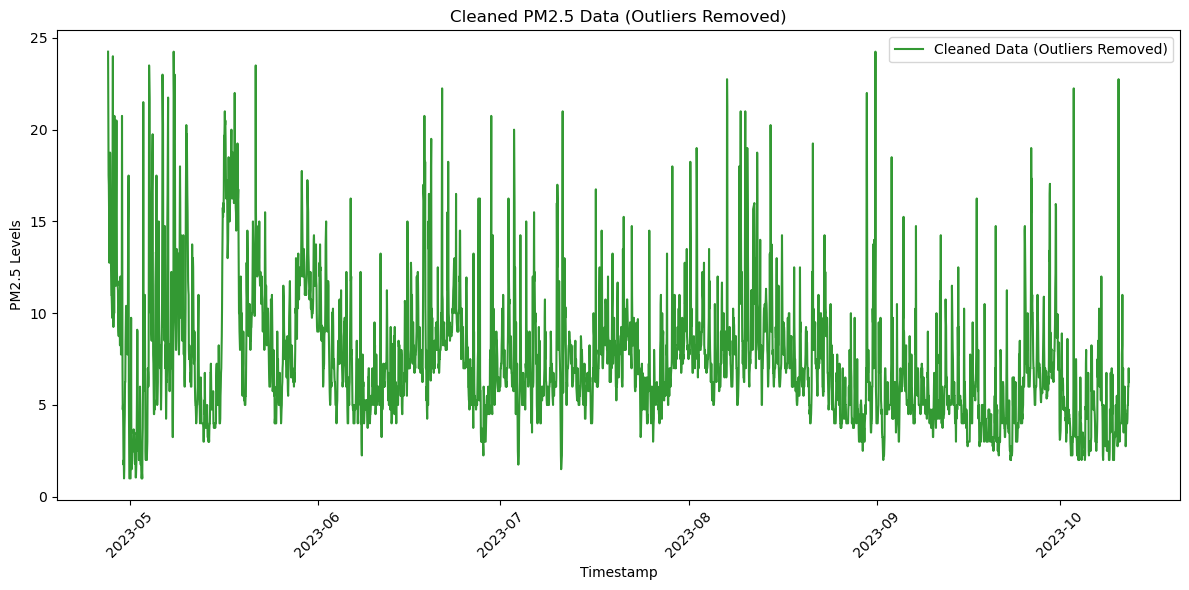

Outliers removed, cleaned dataset saved as 'pm25_cleaned.csv'.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace 'pm25_data.csv' with your dataset file)
df = pd.read_csv('31_Jaffna_hourly.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Assuming PM2.5 data is in a column named 'PM2.5'
pm25_column = 'PM2.5 (ug/m3)'

# Calculate the Z-Score for each data point
df['Z-Score'] = (df[pm25_column] - df[pm25_column].mean()) / df[pm25_column].std()

# Define a threshold for detecting outliers
threshold = 3  # Z-Score > 3 or < -3 indicates an outlier

# Identify outliers
df['Outlier'] = (df['Z-Score'].abs() > threshold)

# Remove outliers
df_cleaned = df[~df['Outlier']].drop(columns=['Z-Score', 'Outlier'])

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('PM2.5_Jaffna_Cleaned.csv')

# Plot the original data with outliers
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[pm25_column], label='Original Data (With Outliers)', color='blue', alpha=0.7)
plt.title('Original PM2.5 Data (With Outliers)')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned[pm25_column], label='Cleaned Data (Outliers Removed)', color='green', alpha=0.8)
plt.title('Cleaned PM2.5 Data (Outliers Removed)')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

print("Outliers removed, cleaned dataset saved as 'pm25_cleaned.csv'.")


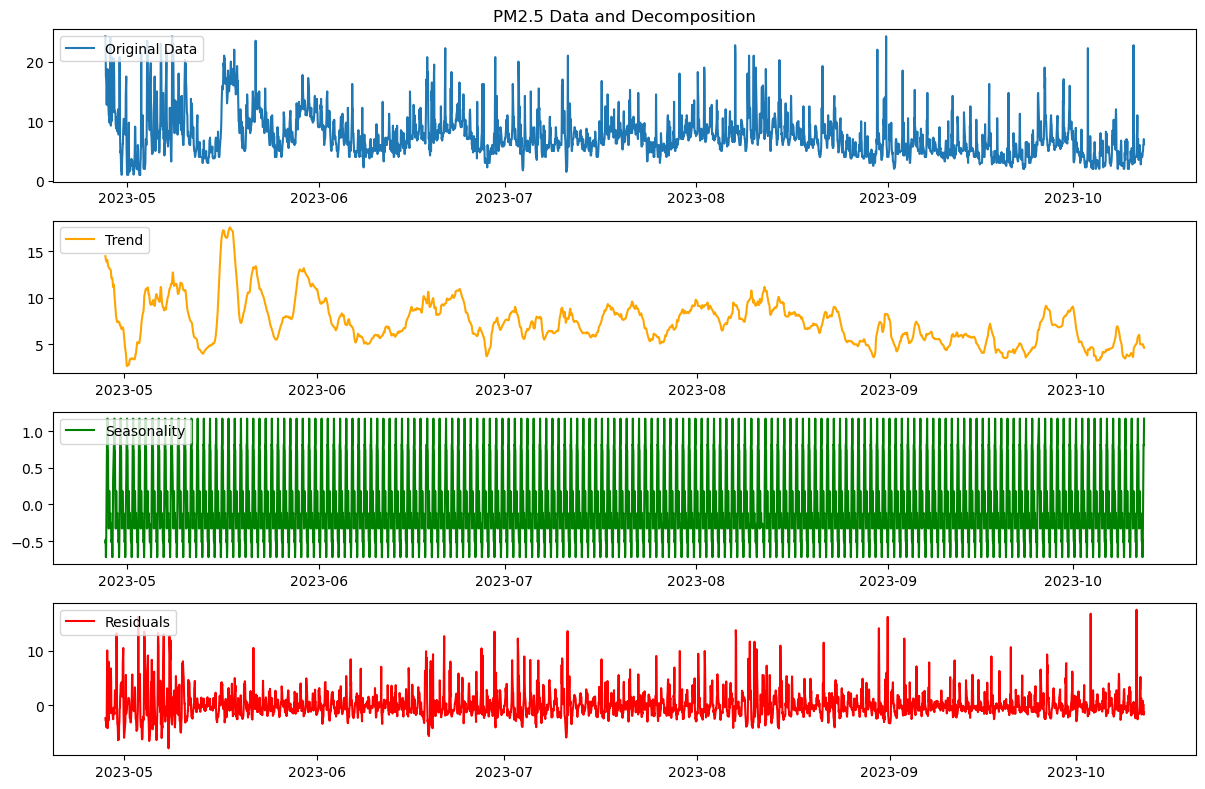

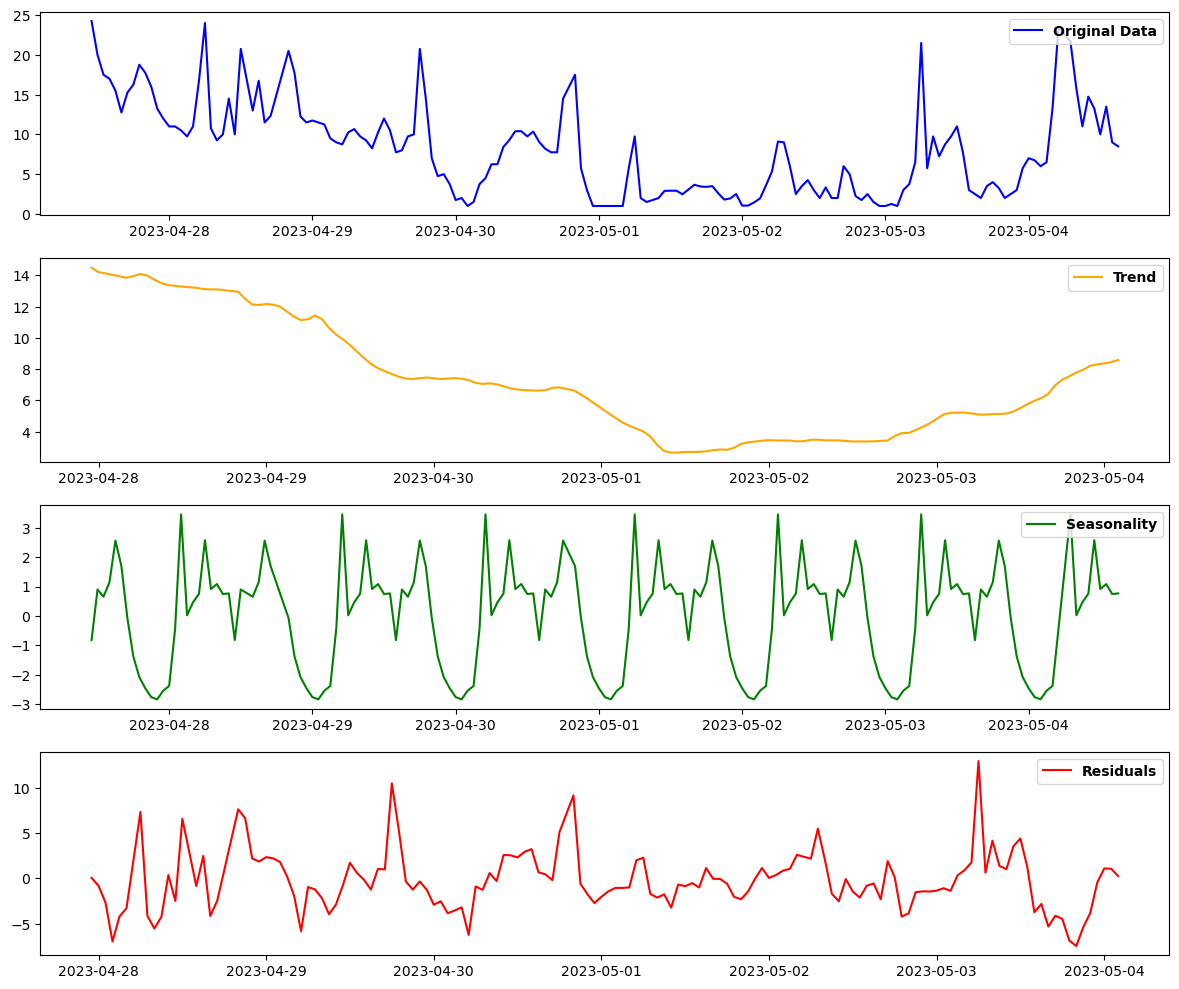

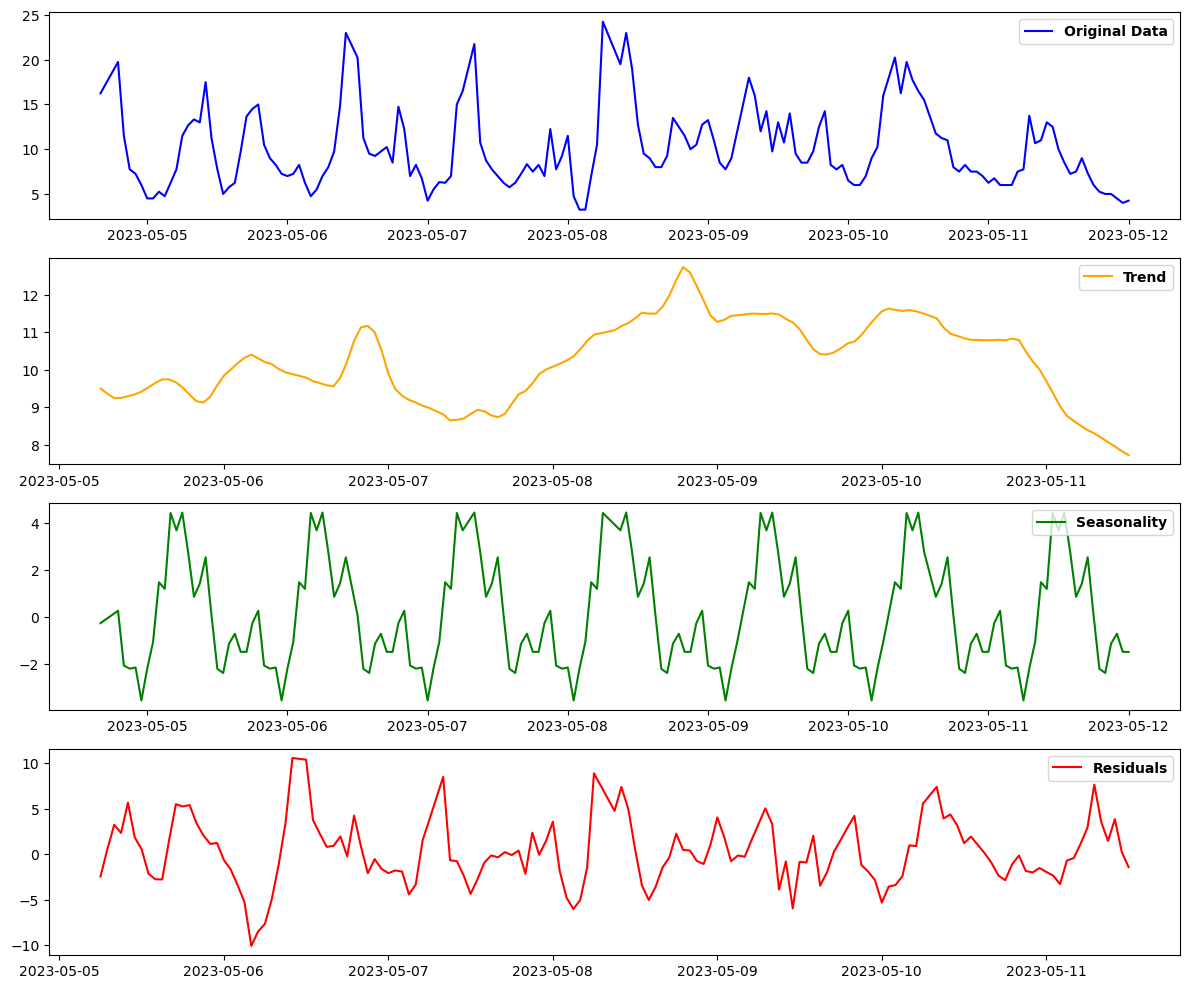

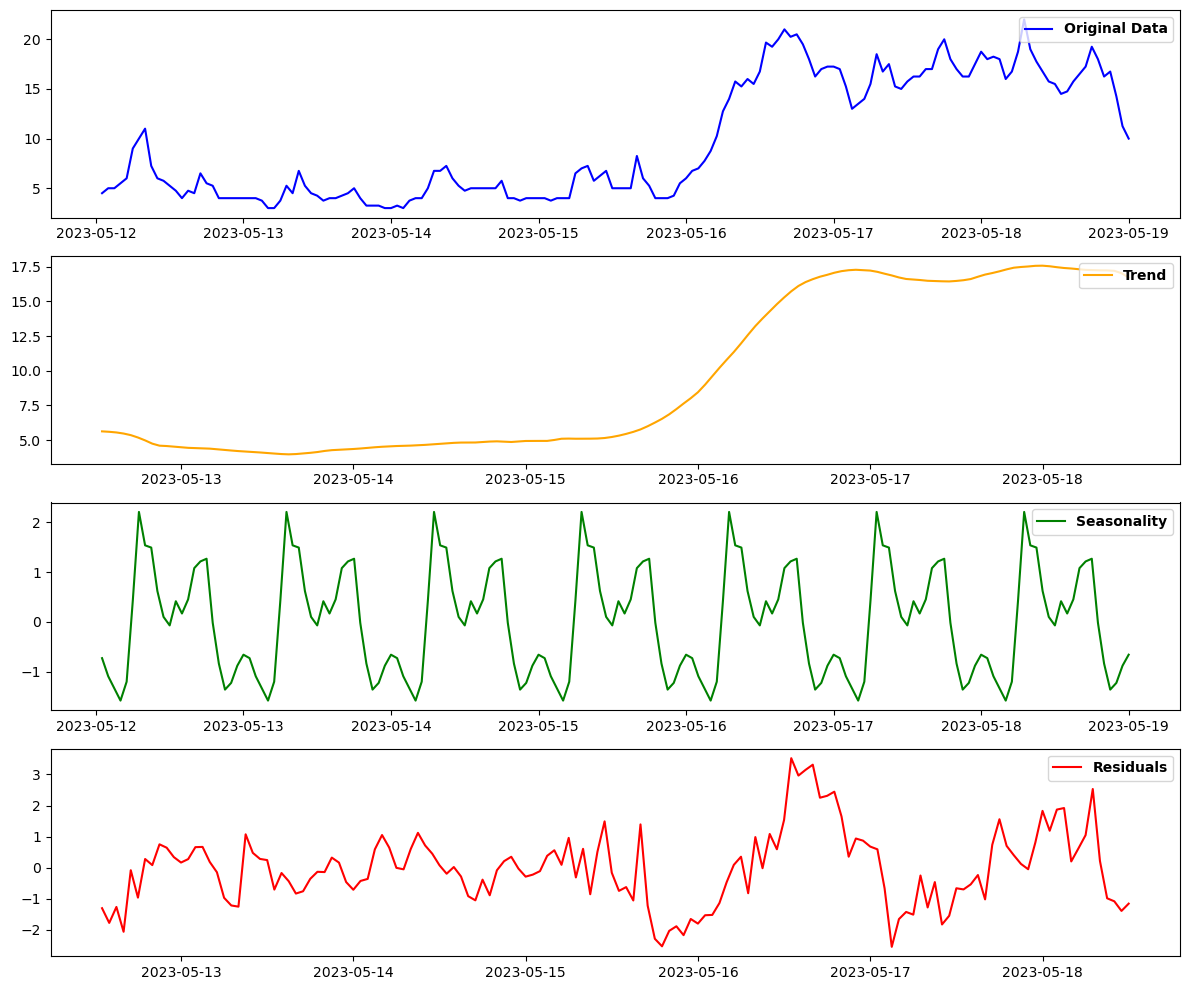

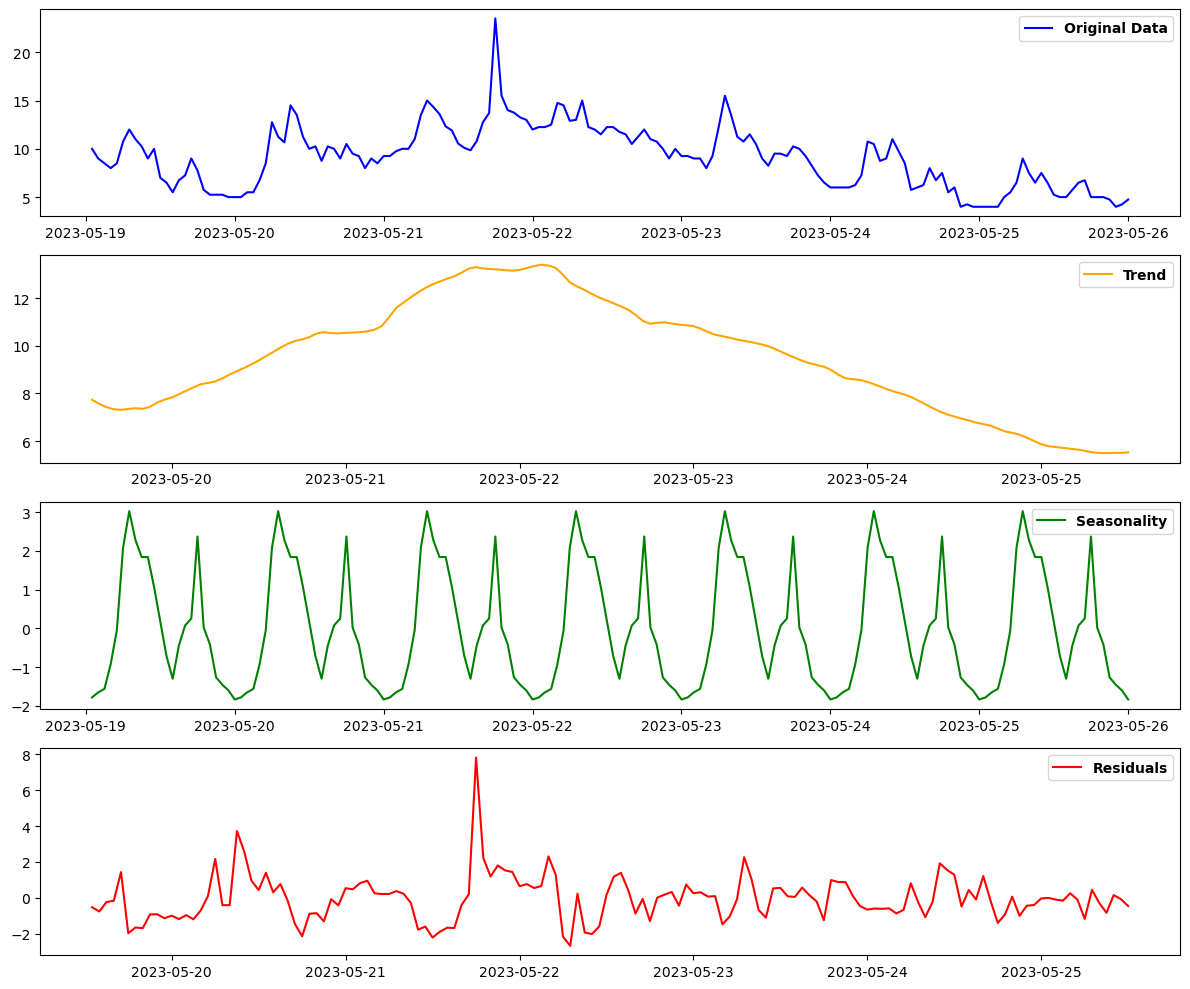

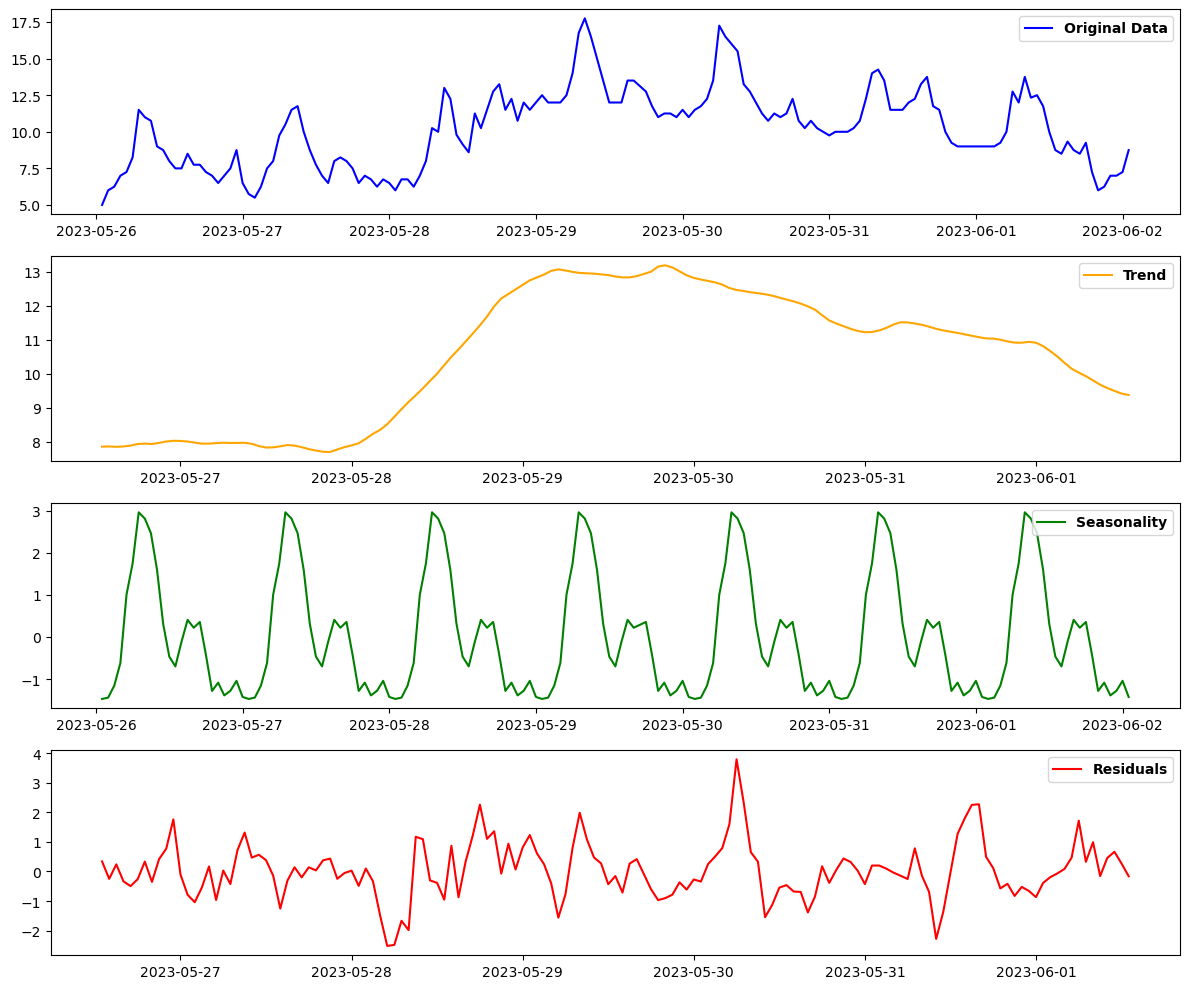

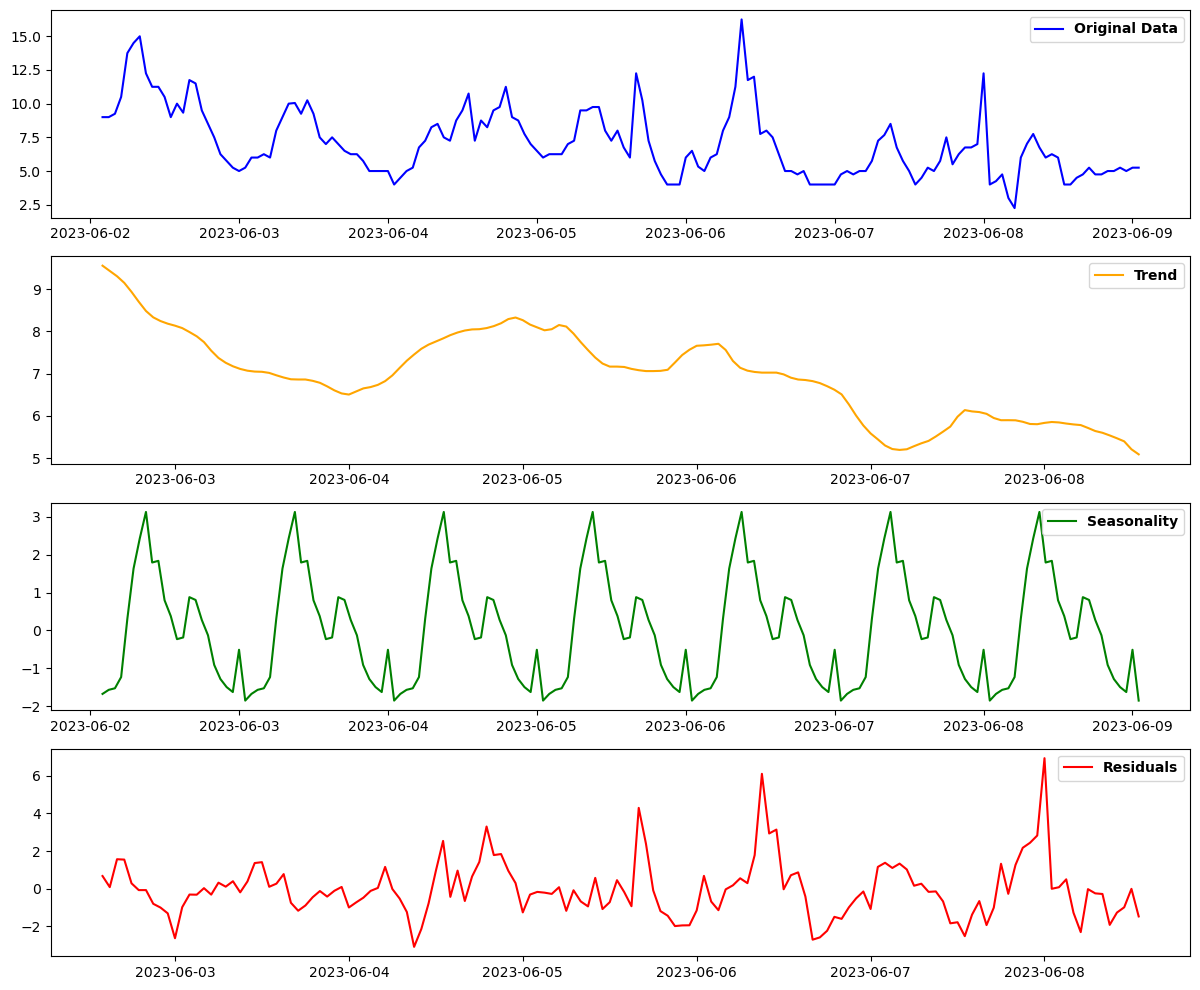

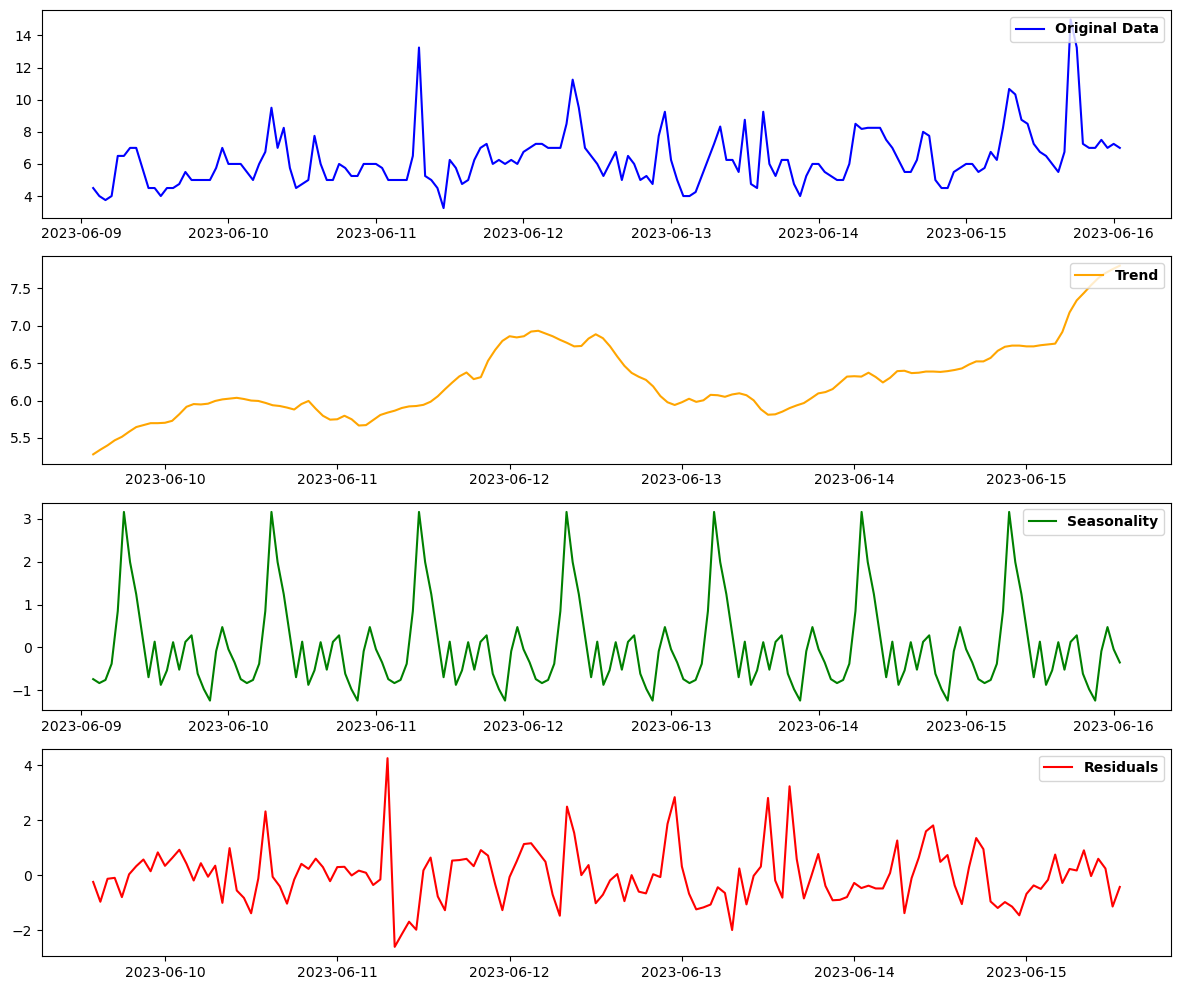

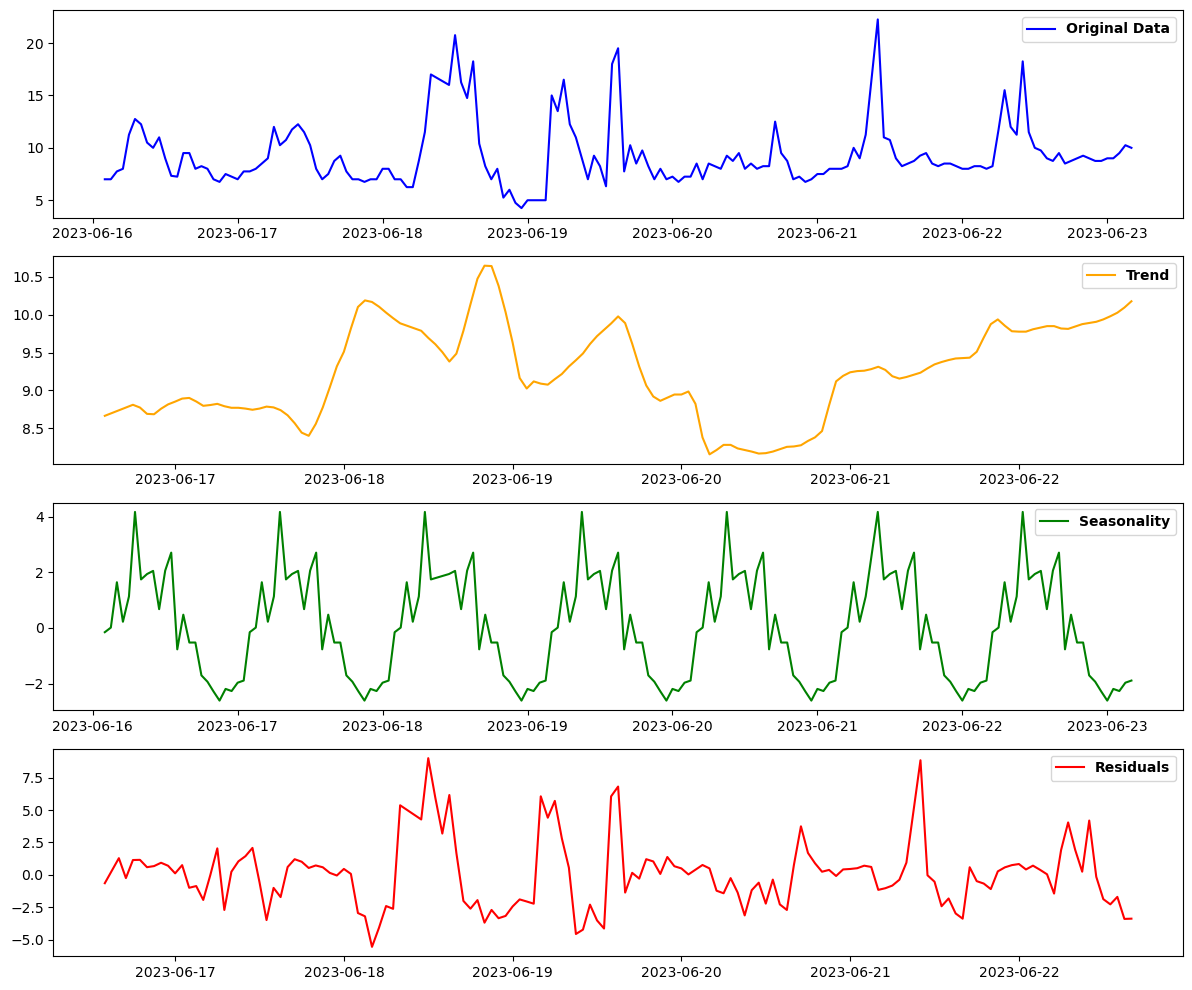

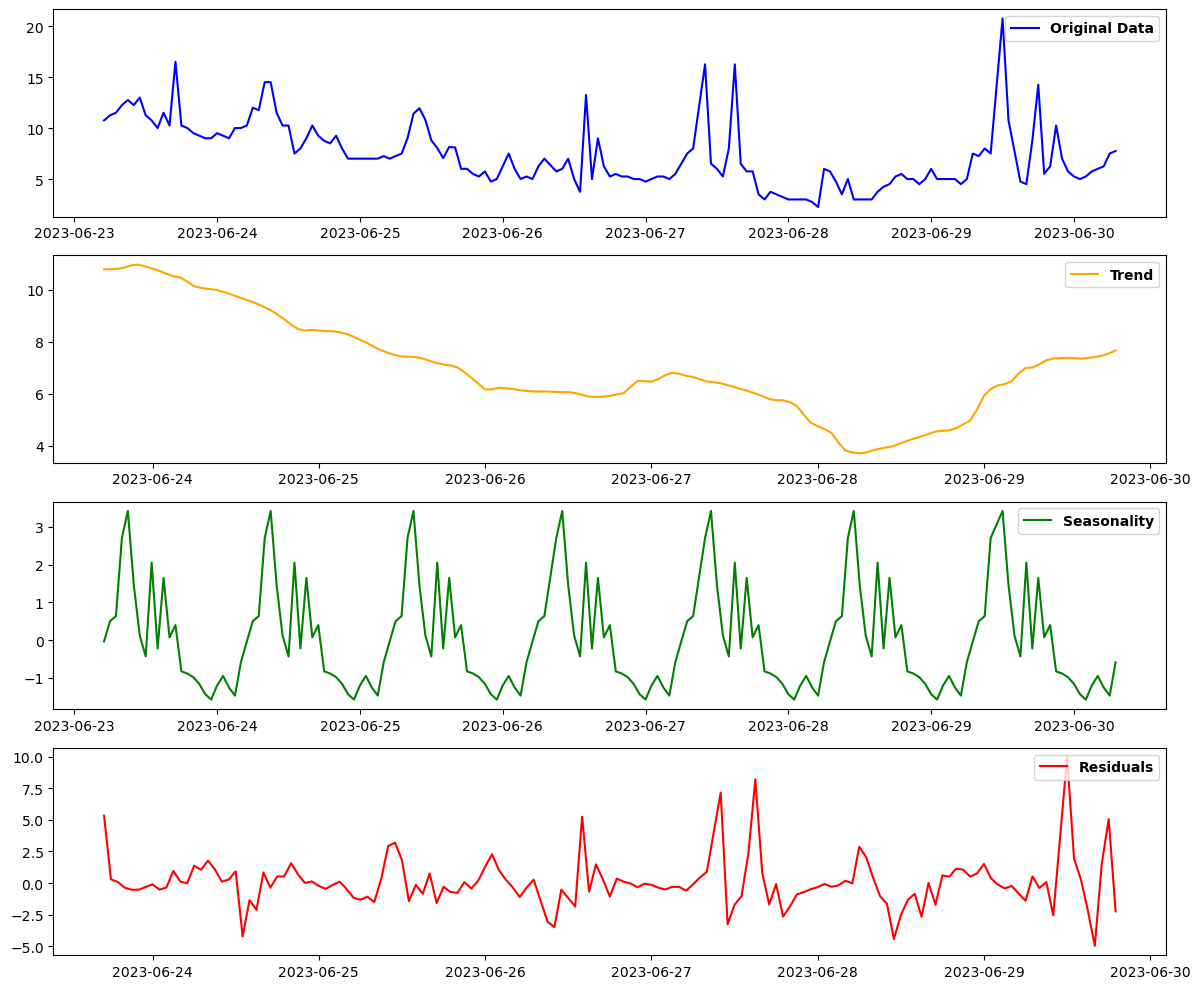

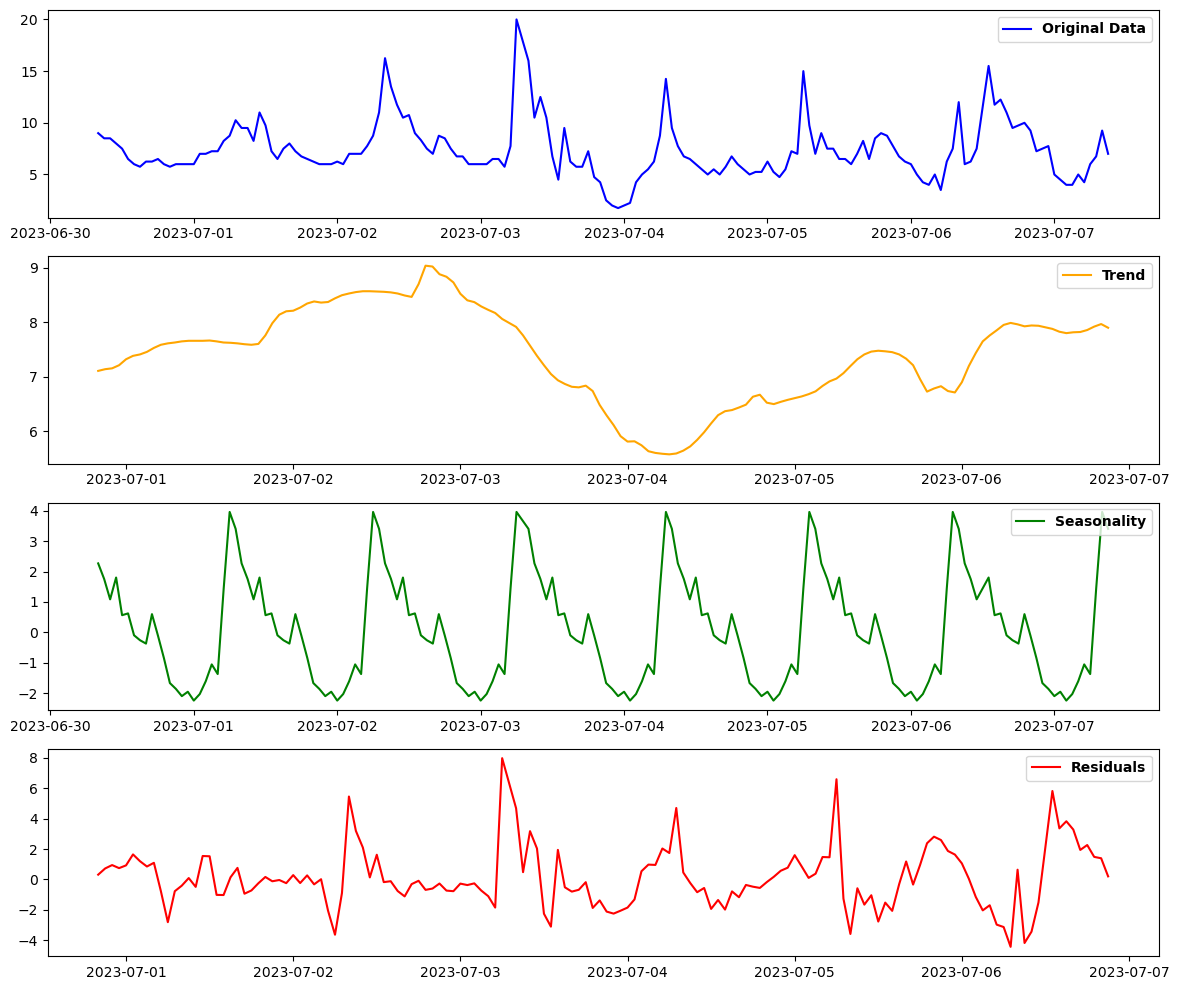

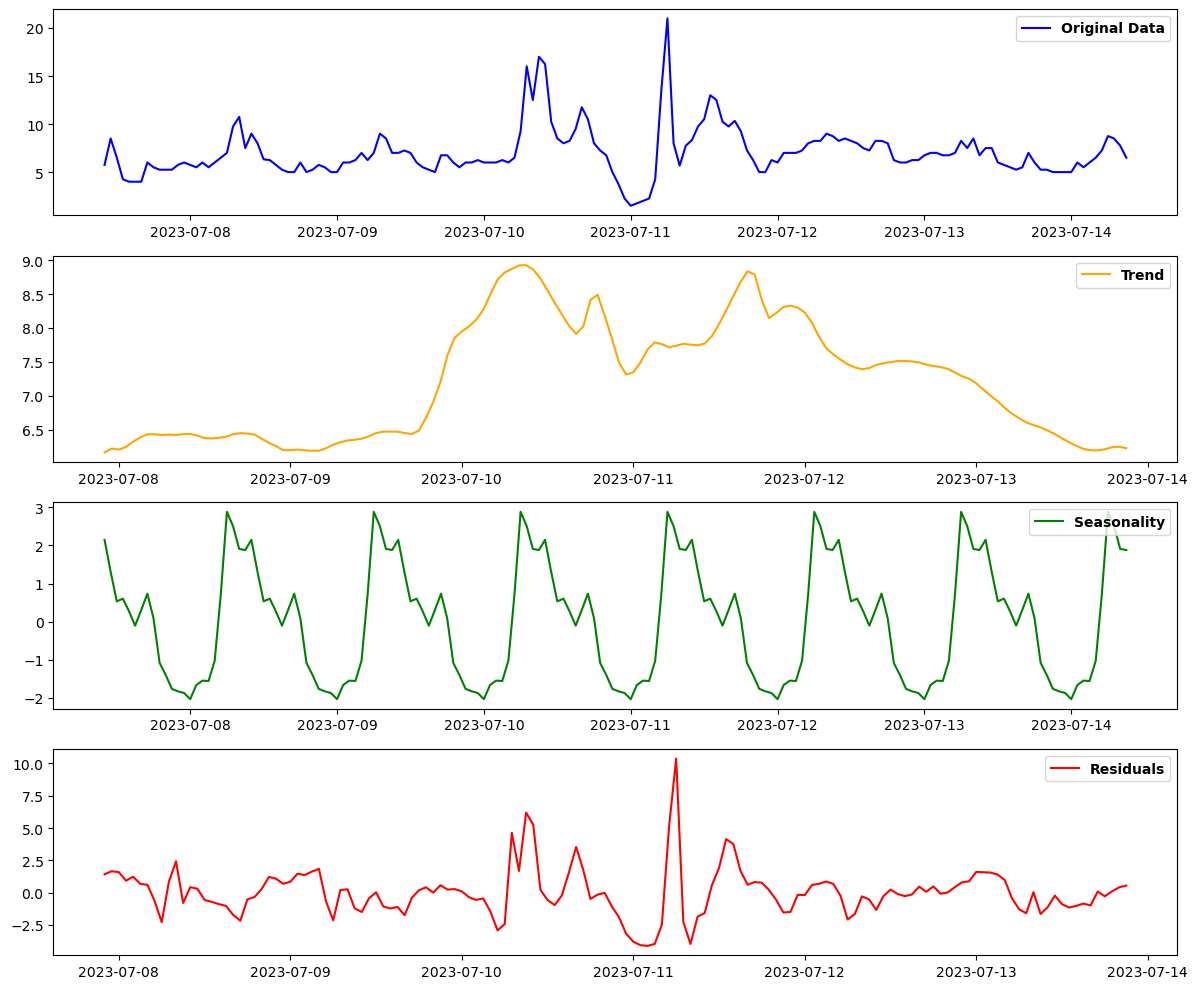

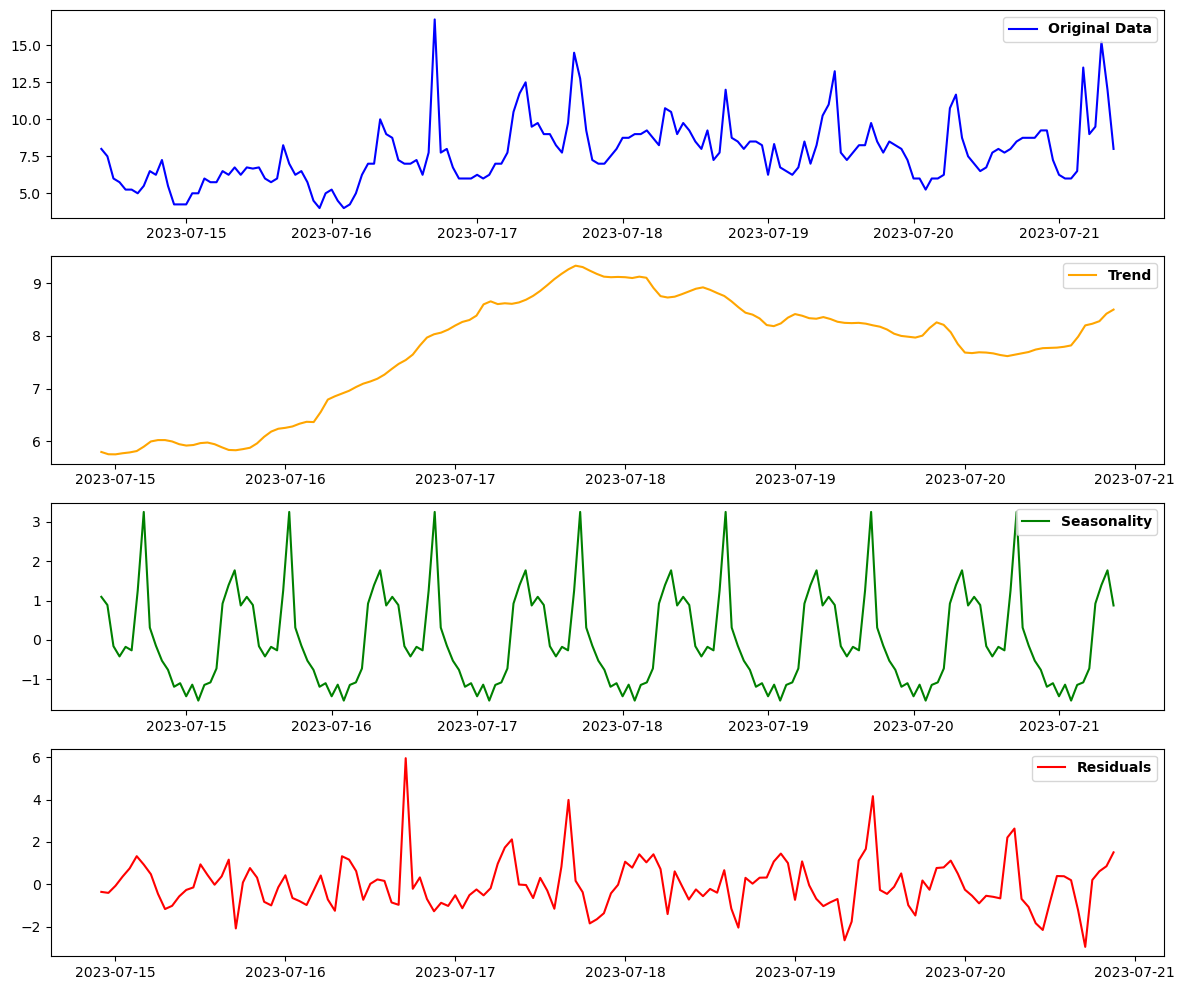

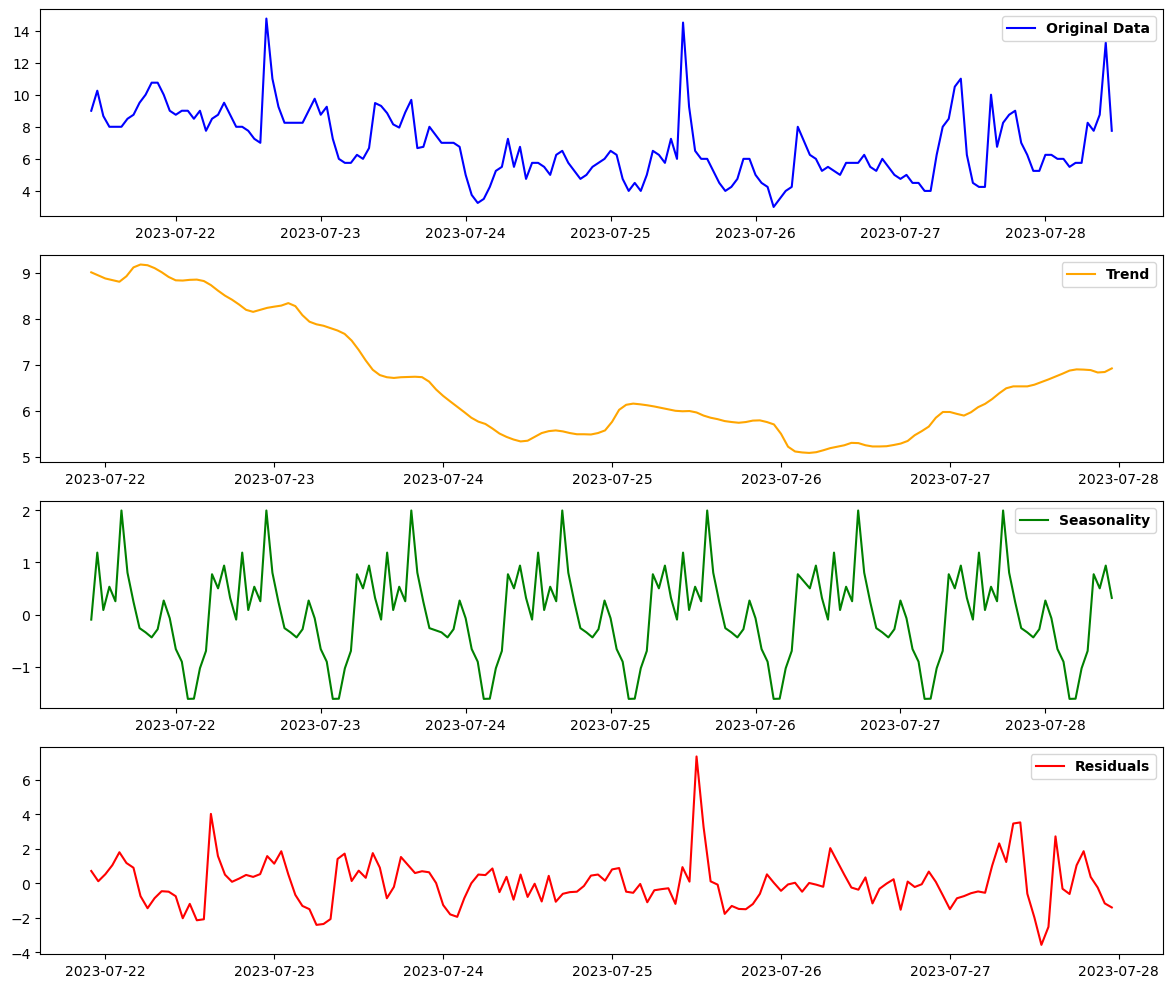

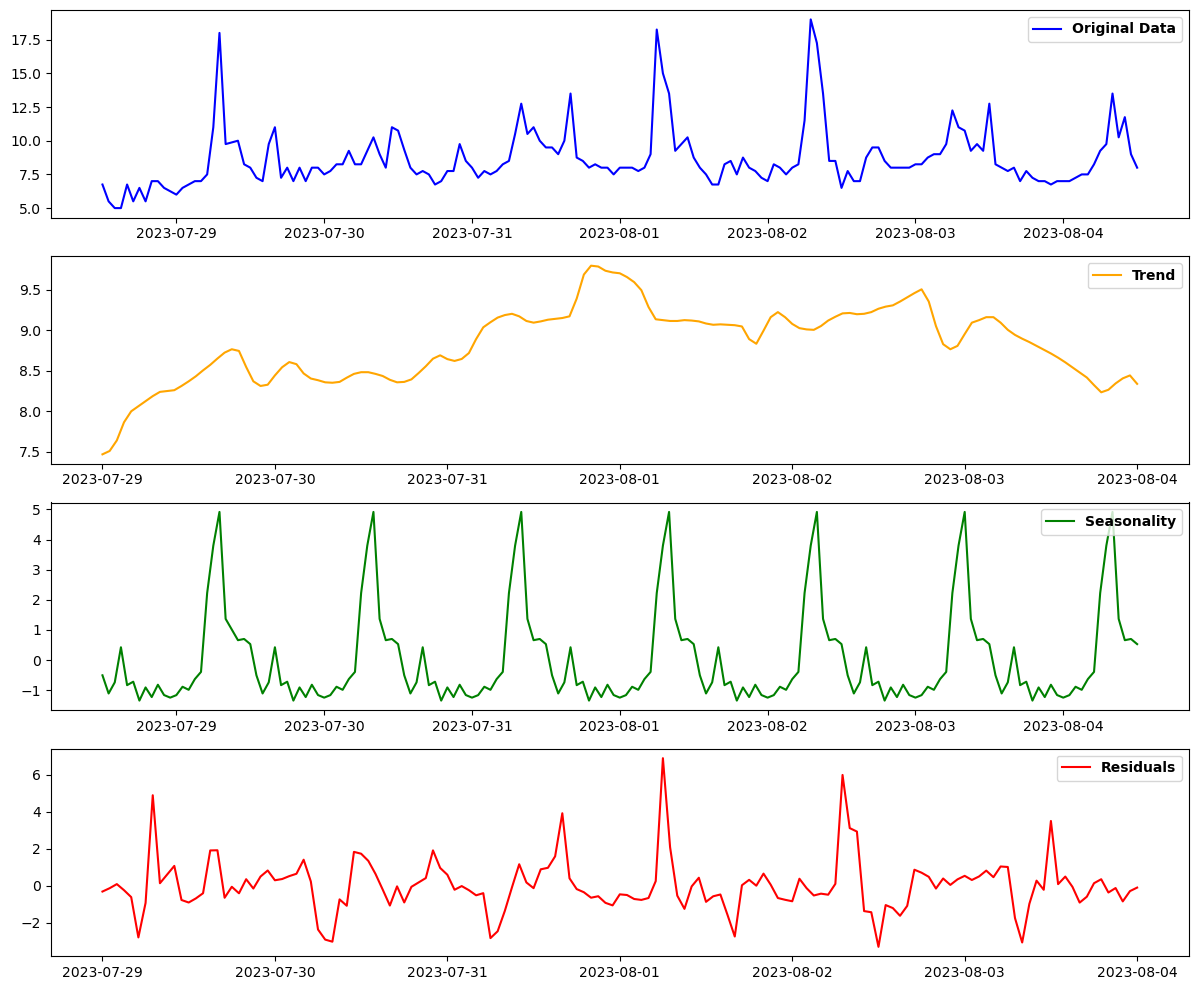

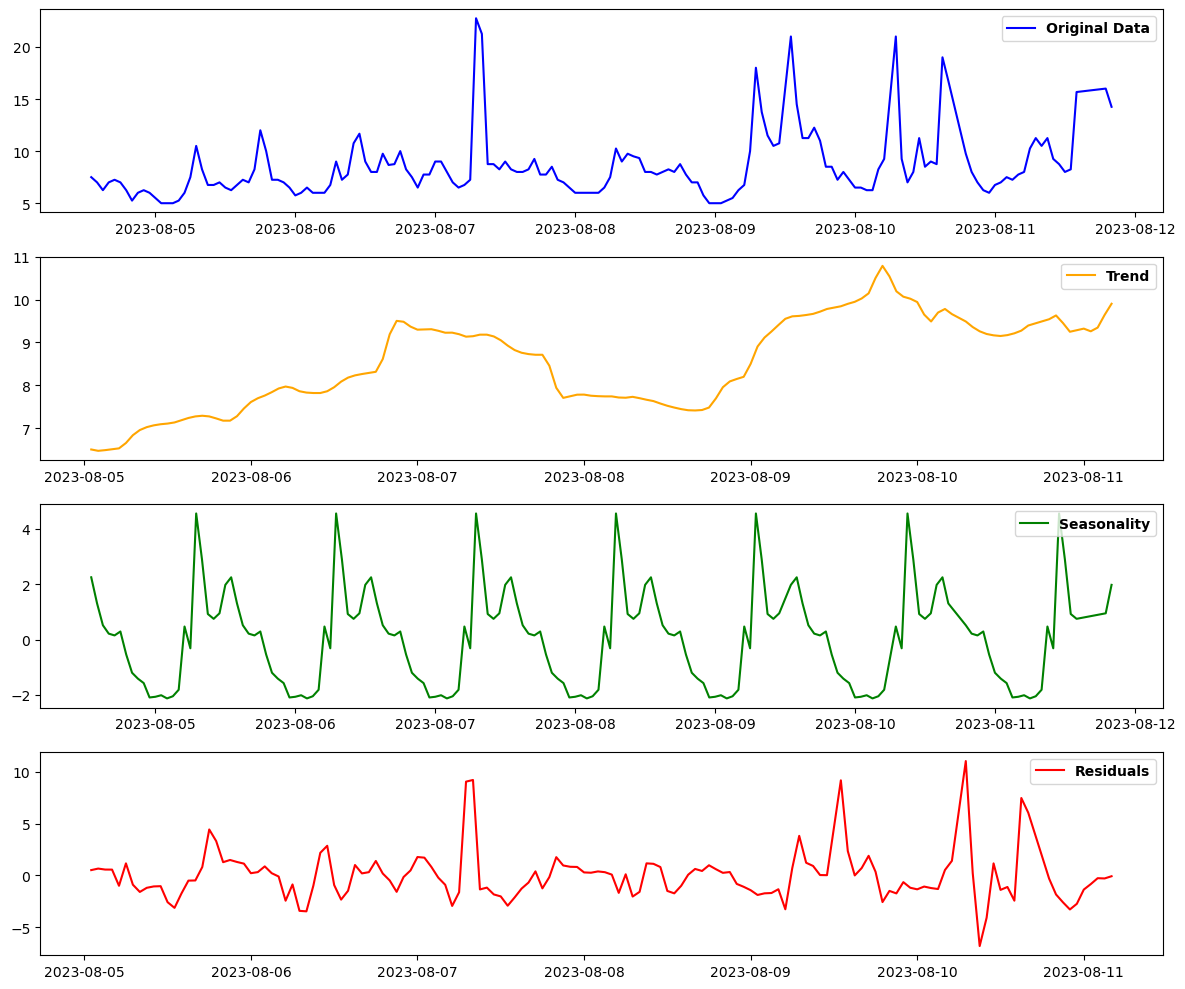

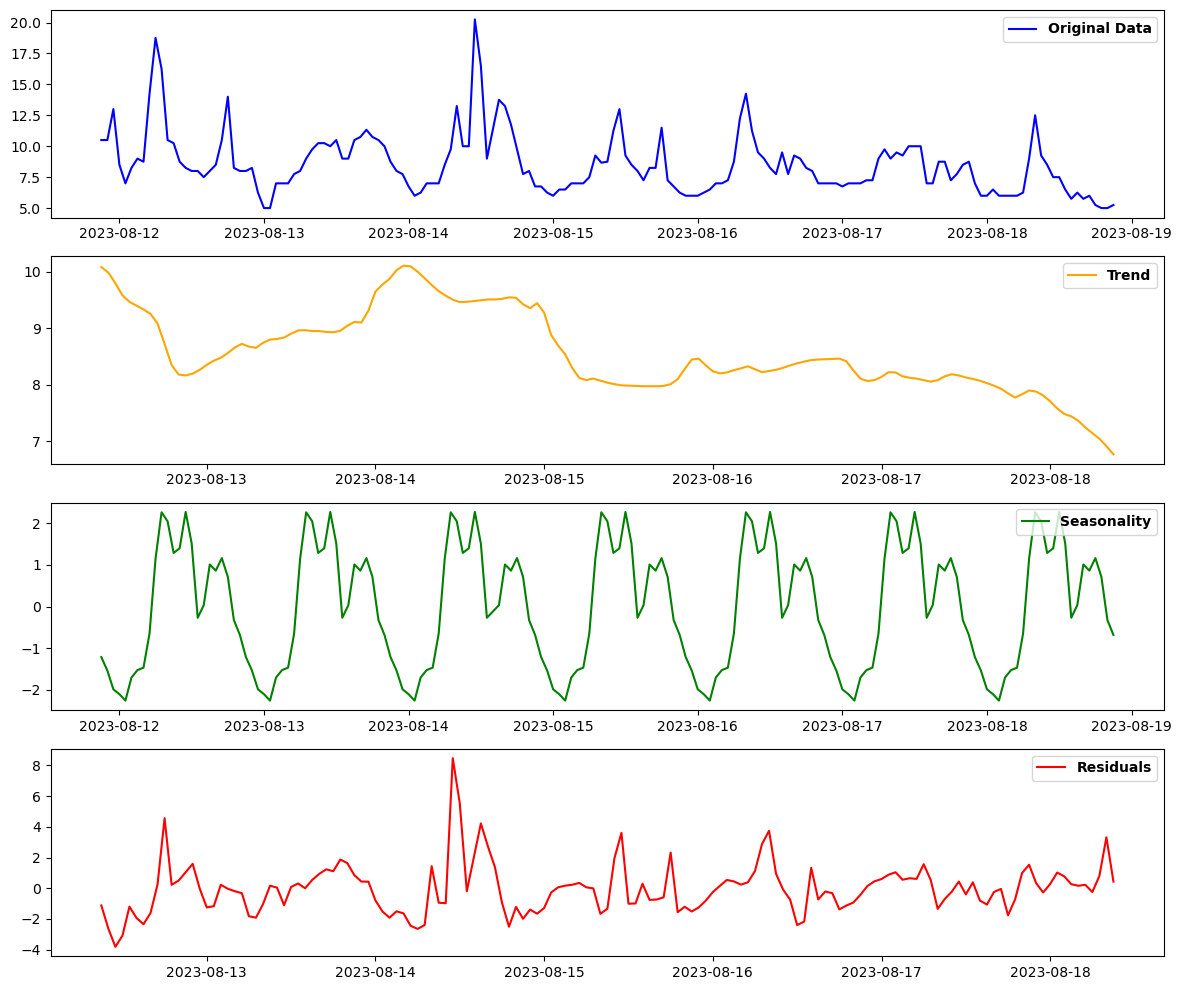

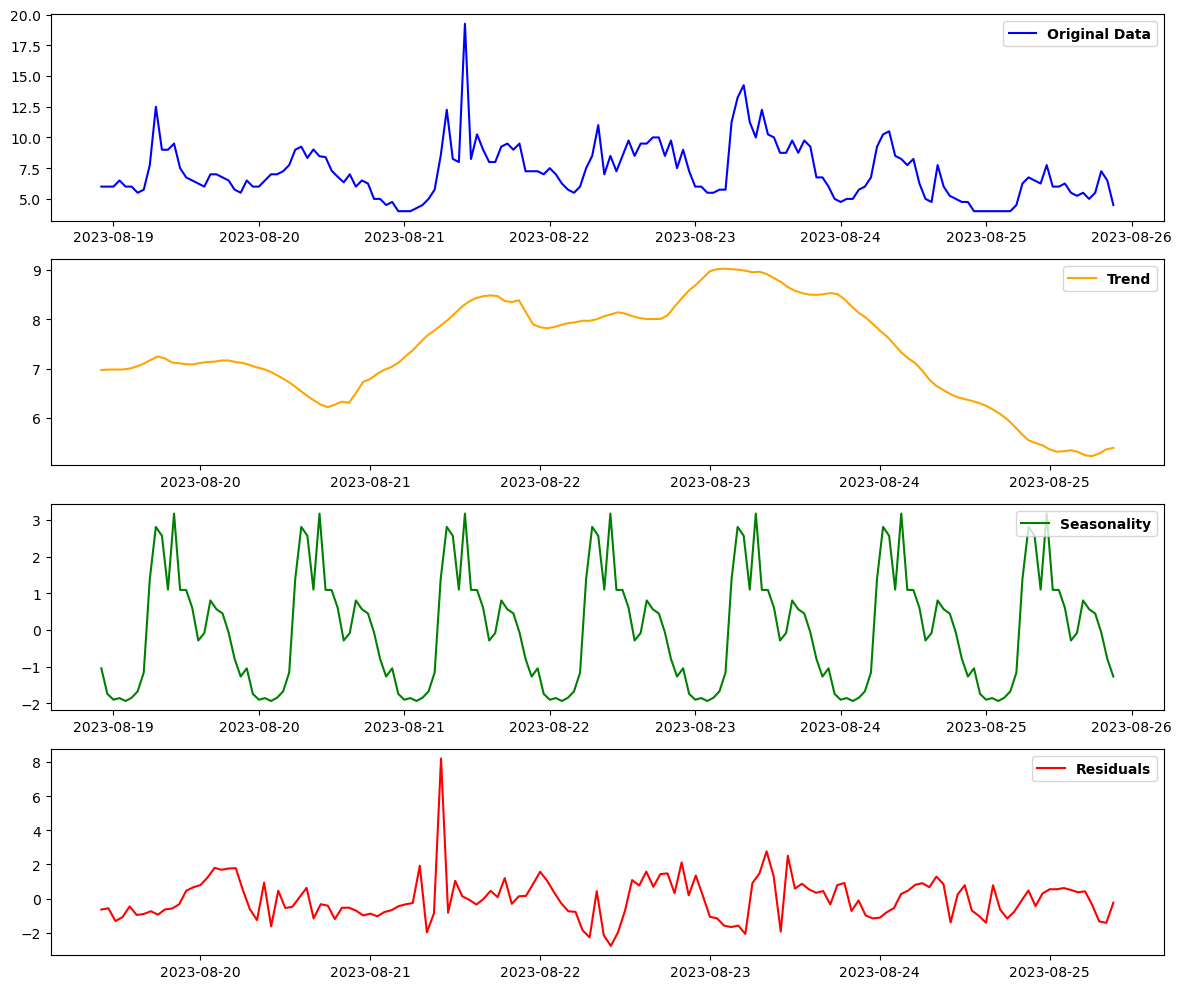

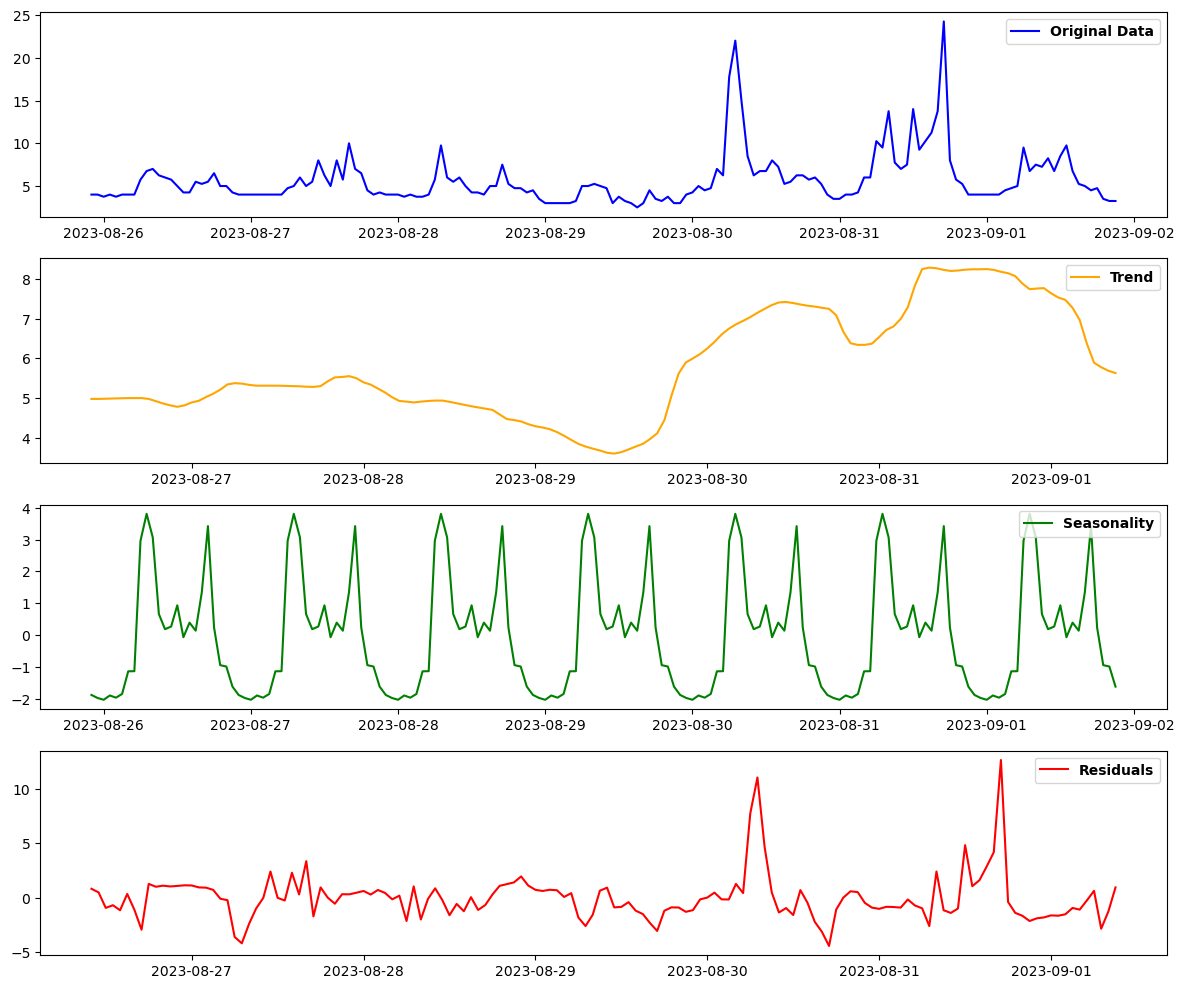

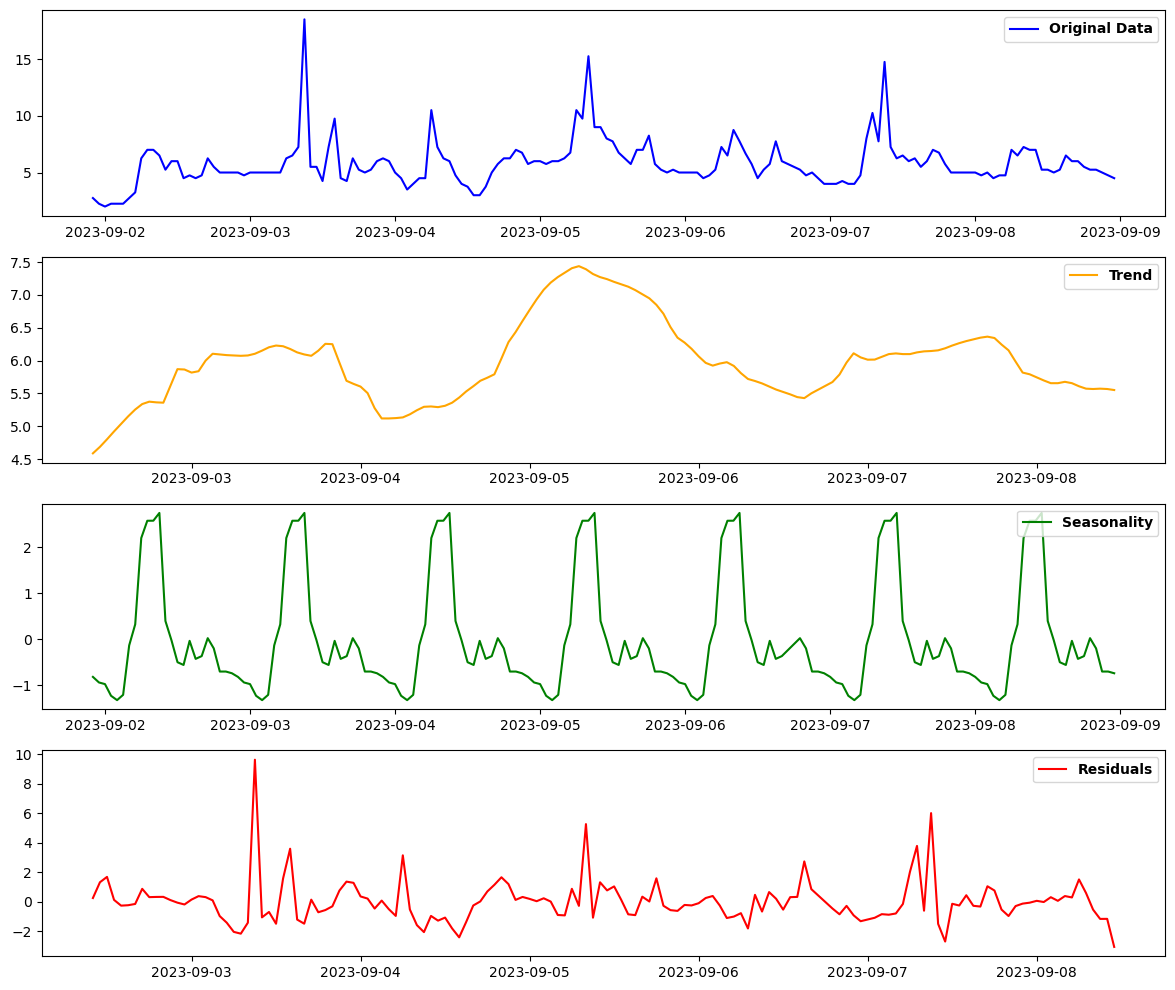

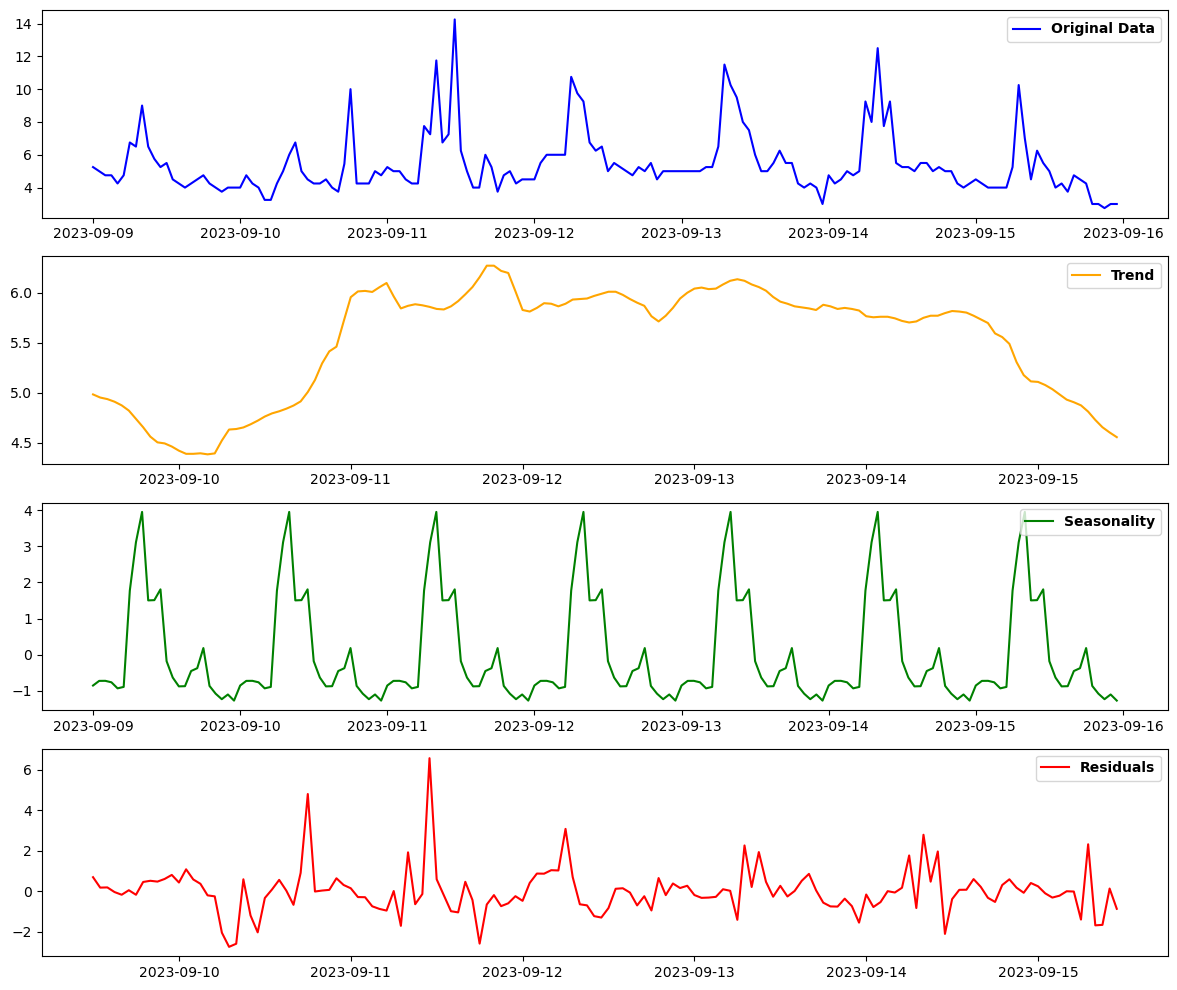

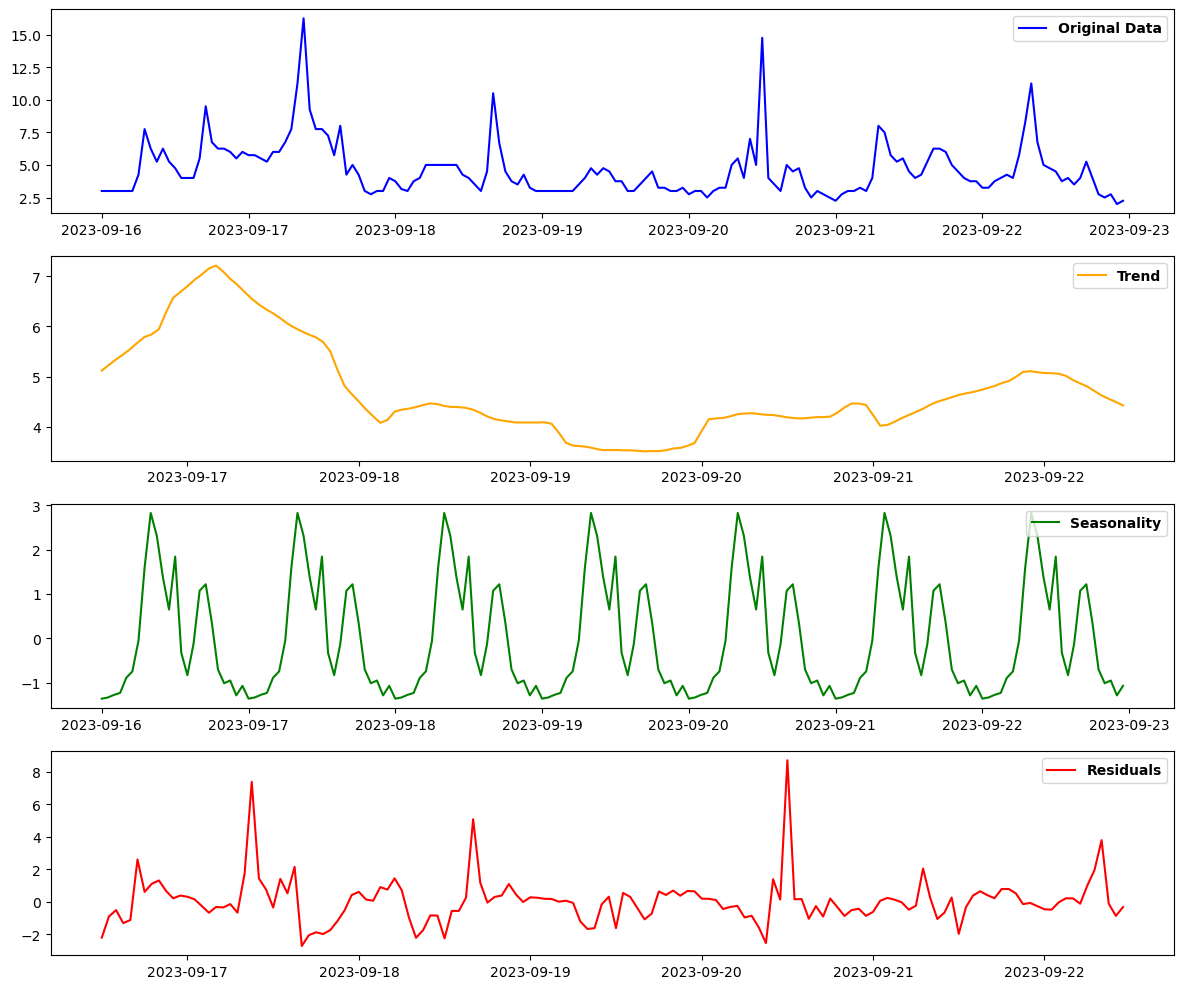

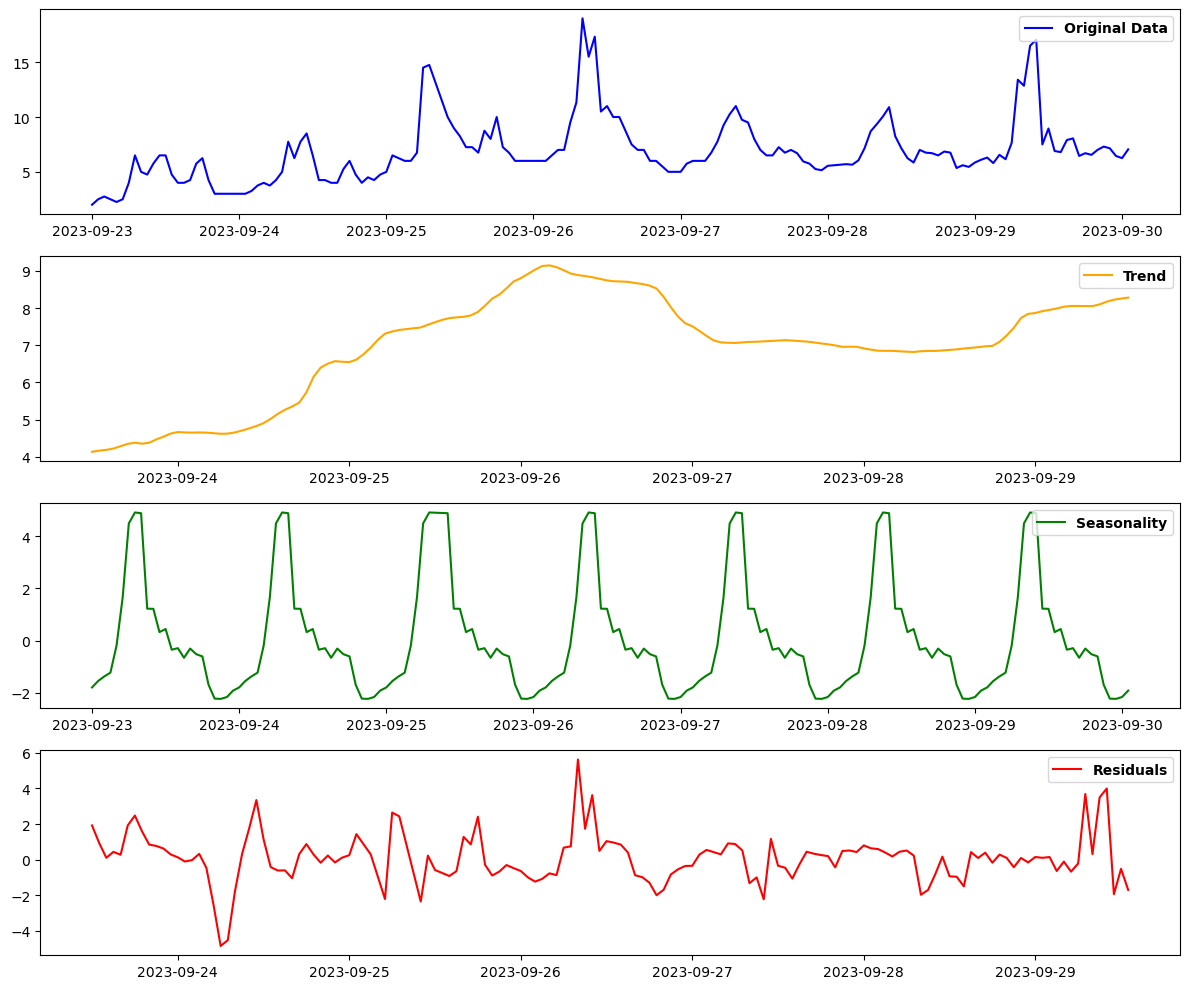

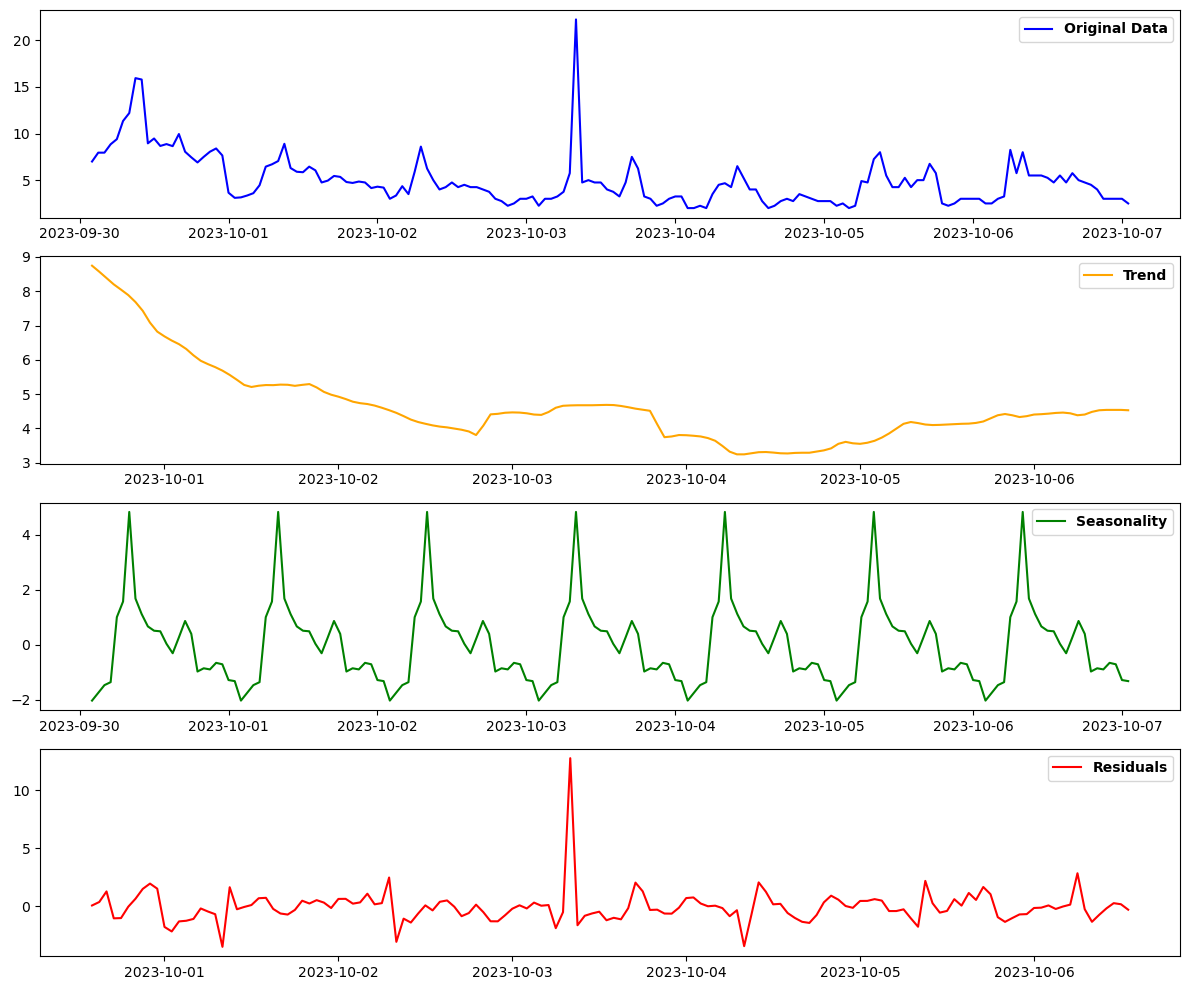

Skipping window 24 due to insufficient data points.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset (replace 'PM2.5_Jaffna_Cleaned.csv' with your actual file)
data = pd.read_csv('PM2.5_Jaffna_Cleaned.csv')

# Ensure the timestamp column is in datetime format and set it as the index
data['timestamp_index'] = pd.to_datetime(data['timestamp_index'])
data.set_index('timestamp_index', inplace=True)

# Choose the PM2.5 column for decomposition (replace 'PM2.5 (ug/m3)' with the actual column name)
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')  # Ensure numeric values

# Drop rows with missing values in the selected column
data = data.dropna(subset=['PM2.5 (ug/m3)'])

# Define window size (e.g., 7 days of hourly data = 7 * 24)
window_size = 7 * 24  # Adjust based on the dataset's periodicity

# Iterate through the dataset in rolling windows
window_count = 1
for start_idx in range(0, len(data), window_size):
    # Select the data for the current window
    window_data = data.iloc[start_idx:start_idx + window_size]
    
    # Ensure sufficient data points in the window
    if len(window_data) < window_size:
        print(f"Skipping window {window_count} due to insufficient data points.")
        continue

    # Perform seasonal decomposition
    try:
        decomposition = seasonal_decompose(window_data['PM2.5 (ug/m3)'], model='additive', period=24)  # Adjust period if needed
    except ValueError as e:
        print(f"Error in decomposition for window {window_count}: {e}")
        continue

    # Extract components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the components for the current window
    plt.figure(figsize=(12, 10))

    plt.subplot(411)
    plt.plot(window_data['PM2.5 (ug/m3)'], label='Original Data', color='blue')
    plt.legend(loc='upper right', prop={'weight': 'bold'})
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    #plt.title(f'Window {window_count}: PM2.5 Data and Decomposition')

    plt.subplot(412)
    plt.plot(trend, label='Trend', color='orange')
    plt.legend(loc='upper right', prop={'weight': 'bold'})
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)

    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color='green')
    plt.legend(loc='upper right', prop={'weight': 'bold'})
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)

    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='red')
    plt.legend(loc='upper right', prop={'weight': 'bold'})
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

    # Increment window count
    window_count += 1


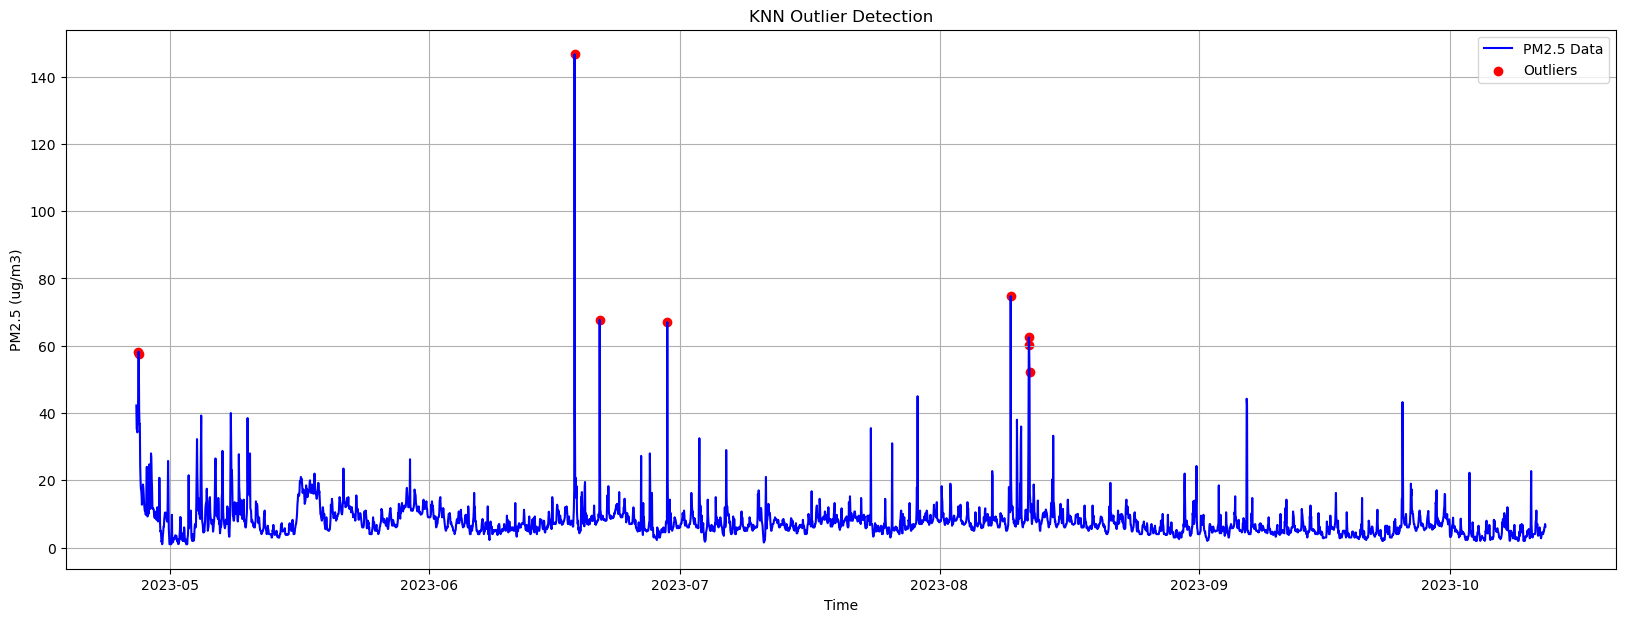

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load the dataset
# Replace 'your_pm25_file.csv' with your dataset file
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')  # Adjust column names as needed

# Define the PM2.5 column
pm25_column = "PM2.5 (ug/m3)"

# Prepare data for KNN
values = df[[pm25_column]].values

# Fit KNN model
k_neighbors = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(values)
distances, indices = nbrs.kneighbors(values)

# Calculate mean distance to k-nearest neighbors
distances_mean = distances.mean(axis=1)

# Set threshold for outlier detection
threshold = 2  # Fixed threshold
outlier_index = (np.abs(distances_mean - distances_mean.mean()) / distances_mean.std() > threshold)

# Identify outlier timestamps and values
outlier_timestamps = df.index[outlier_index]
outlier_values = df.loc[outlier_timestamps, pm25_column]

# Plot the results
plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="b", label="PM2.5 Data")
plt.scatter(outlier_timestamps, outlier_values, color="r", label="Outliers")
plt.title("KNN Outlier Detection")
plt.xlabel("Time")
plt.ylabel("PM2.5 (ug/m3)")
plt.legend()
plt.grid(True)
plt.show()


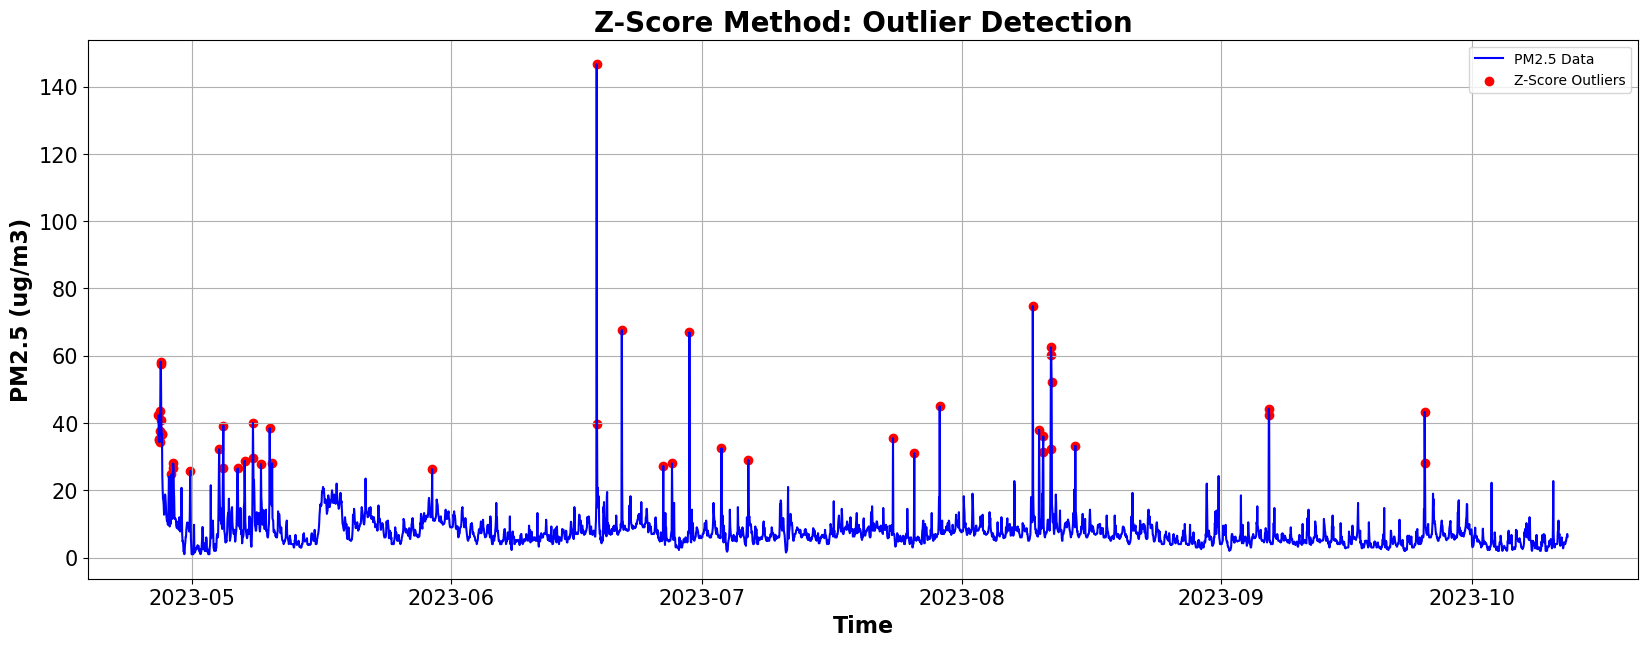

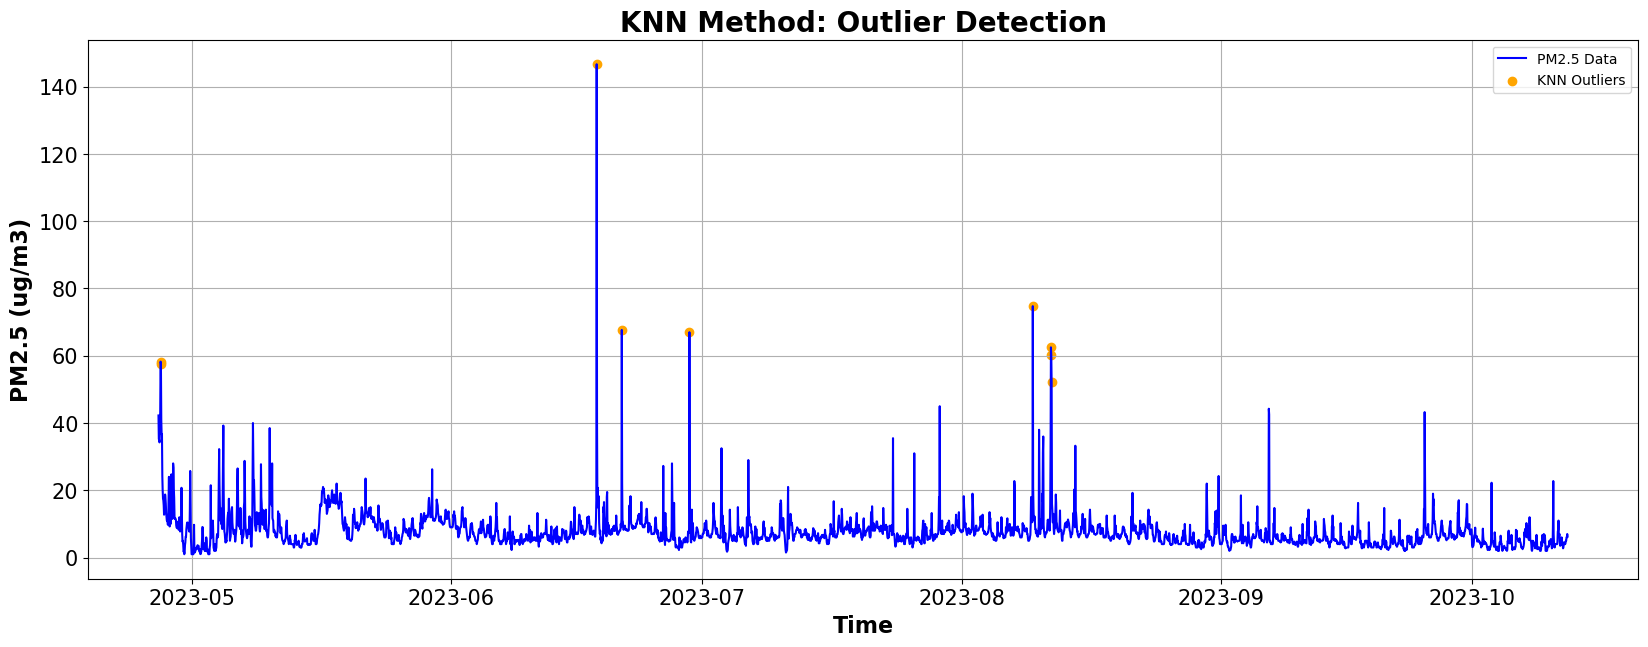

Number of Z-Score Outliers: 50
Number of KNN Outliers: 9
Number of Common Outliers: 9
Overlap Percentage between Z-Score and KNN Outliers: 18.00%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load the dataset
# Replace 'your_pm25_file.csv' with your dataset file
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')  # Adjust column names if needed

# Define the PM2.5 column
pm25_column = "PM2.5 (ug/m3)"
pm25_values = df[pm25_column]

# --- Z-Score Method ---
# Calculate Z-scores
z_scores = (pm25_values - pm25_values.mean()) / pm25_values.std()
z_threshold = 3  # Z-score threshold
z_outliers = z_scores.abs() > z_threshold

# Extract Z-score outliers
z_outlier_timestamps = df.index[z_outliers]
z_outlier_values = df.loc[z_outlier_timestamps, pm25_column]

# --- KNN Method ---
# Prepare data for KNN
values = df[[pm25_column]].values

# Fit KNN model
k_neighbors = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(values)
distances, indices = nbrs.kneighbors(values)

# Calculate mean distance to k-nearest neighbors
distances_mean = distances.mean(axis=1)

# Set KNN threshold
knn_threshold = 2  # Standard deviation threshold
knn_outliers = (np.abs(distances_mean - distances_mean.mean()) / distances_mean.std() > knn_threshold)

# Extract KNN outliers
knn_outlier_timestamps = df.index[knn_outliers]
knn_outlier_values = df.loc[knn_outlier_timestamps, pm25_column]

# --- Plot Z-Score Method Results ---
plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="b", label="PM2.5 Data")
plt.scatter(z_outlier_timestamps, z_outlier_values, color="r", label="Z-Score Outliers")
plt.title("Z-Score Method: Outlier Detection",fontsize=20,weight='bold')
plt.xlabel("Time",fontsize=16,weight='bold')
plt.ylabel("PM2.5 (ug/m3)",fontsize=16,weight='bold')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

# --- Plot KNN Method Results ---
plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="b", label="PM2.5 Data")
plt.scatter(knn_outlier_timestamps, knn_outlier_values, color="orange", label="KNN Outliers")
plt.title("KNN Method: Outlier Detection",fontsize=20,weight='bold')
plt.xlabel("Time",fontsize=16,weight='bold')
plt.ylabel("PM2.5 (ug/m3)",fontsize=16,weight='bold')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

# --- Comparison ---
# Convert timestamps to sets for comparison
z_outliers_set = set(z_outlier_timestamps)
knn_outliers_set = set(knn_outlier_timestamps)

# Common outliers
common_outliers = z_outliers_set.intersection(knn_outliers_set)

# Print analysis
print("Number of Z-Score Outliers:", len(z_outliers_set))
print("Number of KNN Outliers:", len(knn_outliers_set))
print("Number of Common Outliers:", len(common_outliers))

# Accuracy analysis (Overlap percentage)
if len(z_outliers_set) > 0 and len(knn_outliers_set) > 0:
    overlap_percentage = (len(common_outliers) / len(z_outliers_set)) * 100
    print(f"Overlap Percentage between Z-Score and KNN Outliers: {overlap_percentage:.2f}%")


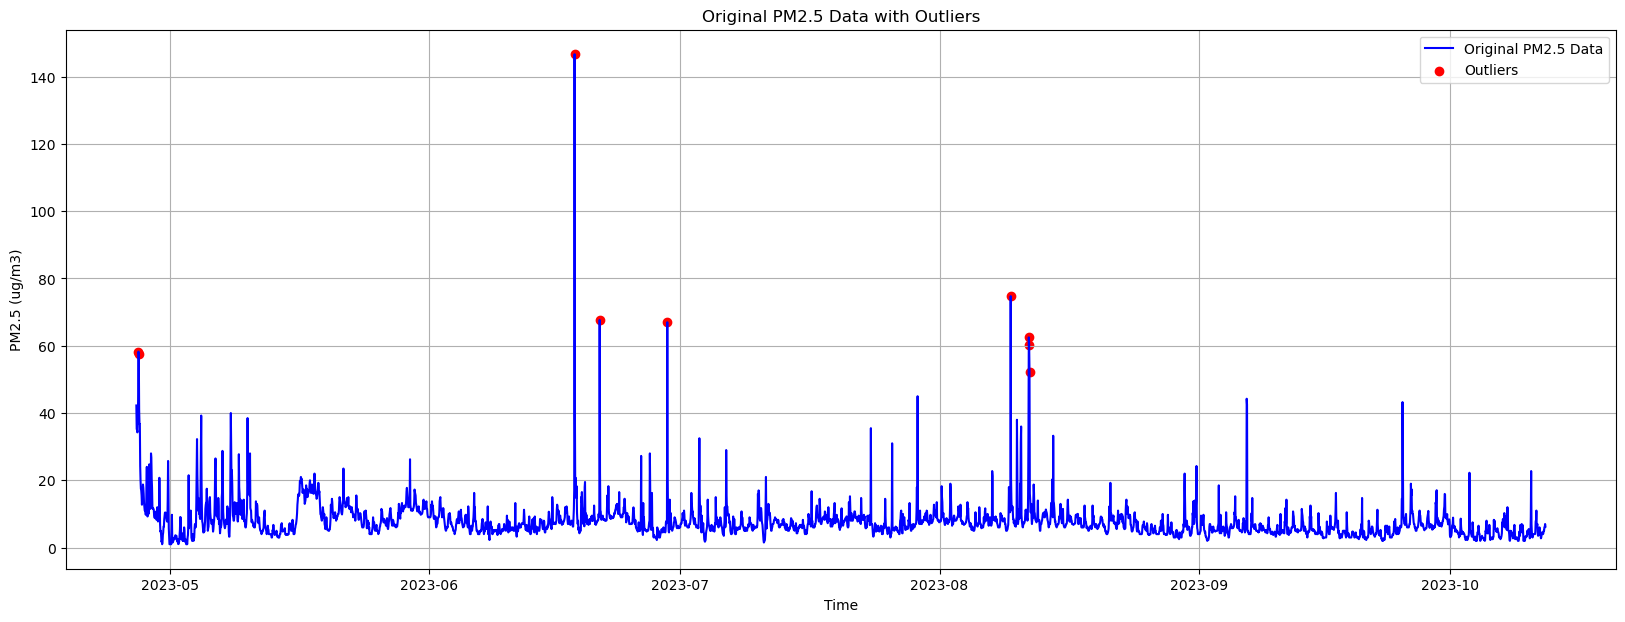

KNN Imputation RMSE: 0.0
Linear Interpolation RMSE: 0.0
Mean Imputation RMSE: 0.0
The best imputation method based on RMSE is: Mean Imputation


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Define the PM2.5 column
pm25_column = "PM2.5 (ug/m3)"

# Prepare data for KNN
values = df[[pm25_column]].values

# Fit KNN model
k_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(values)
distances, indices = nbrs.kneighbors(values)

# Calculate mean distance to k-nearest neighbors
distances_mean = distances.mean(axis=1)

# Set threshold for outlier detection
threshold = 2
outlier_index = (np.abs(distances_mean - distances_mean.mean()) / distances_mean.std() > threshold)

# Identify outlier timestamps and values
outlier_timestamps = df.index[outlier_index]
outlier_values = df.loc[outlier_timestamps, pm25_column]

# Impute the outliers using different methods

# 1. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=k_neighbors)
df_knn_imputed = df.copy()
df_knn_imputed[pm25_column] = knn_imputer.fit_transform(df[[pm25_column]])

# 2. Linear Interpolation
df_linear_interp = df.copy()
df_linear_interp[pm25_column] = df[pm25_column].interpolate(method='linear')

# 3. Mean Imputation
mean_value = df[pm25_column].mean()
df_mean_imputed = df.copy()
df_mean_imputed[pm25_column] = df[pm25_column].fillna(mean_value)

# Plot the original and imputed results

plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="b", label="Original PM2.5 Data")
plt.scatter(outlier_timestamps, outlier_values, color="r", label="Outliers")
plt.title("Original PM2.5 Data with Outliers")
plt.xlabel("Time")
plt.ylabel("PM2.5 (ug/m3)")
plt.legend()
plt.grid(True)
plt.show()

# Compare accuracy by calculating RMSE for each imputed dataset

# RMSE function
def calculate_rmse(true_values, predicted_values):
    return np.sqrt(mean_squared_error(true_values, predicted_values))

# KNN Imputation RMSE
knn_rmse = calculate_rmse(df[pm25_column], df_knn_imputed[pm25_column])

# Linear Interpolation RMSE
linear_rmse = calculate_rmse(df[pm25_column], df_linear_interp[pm25_column])

# Mean Imputation RMSE
mean_rmse = calculate_rmse(df[pm25_column], df_mean_imputed[pm25_column])

# Print the RMSE values for each method
print(f"KNN Imputation RMSE: {knn_rmse}")
print(f"Linear Interpolation RMSE: {linear_rmse}")
print(f"Mean Imputation RMSE: {mean_rmse}")

# Choose the best imputation method based on the RMSE value
if knn_rmse < linear_rmse and knn_rmse < mean_rmse:
    best_method = "KNN Imputation"
elif linear_rmse < knn_rmse and linear_rmse < mean_rmse:
    best_method = "Linear Interpolation"
else:
    best_method = "Mean Imputation"

print(f"The best imputation method based on RMSE is: {best_method}")


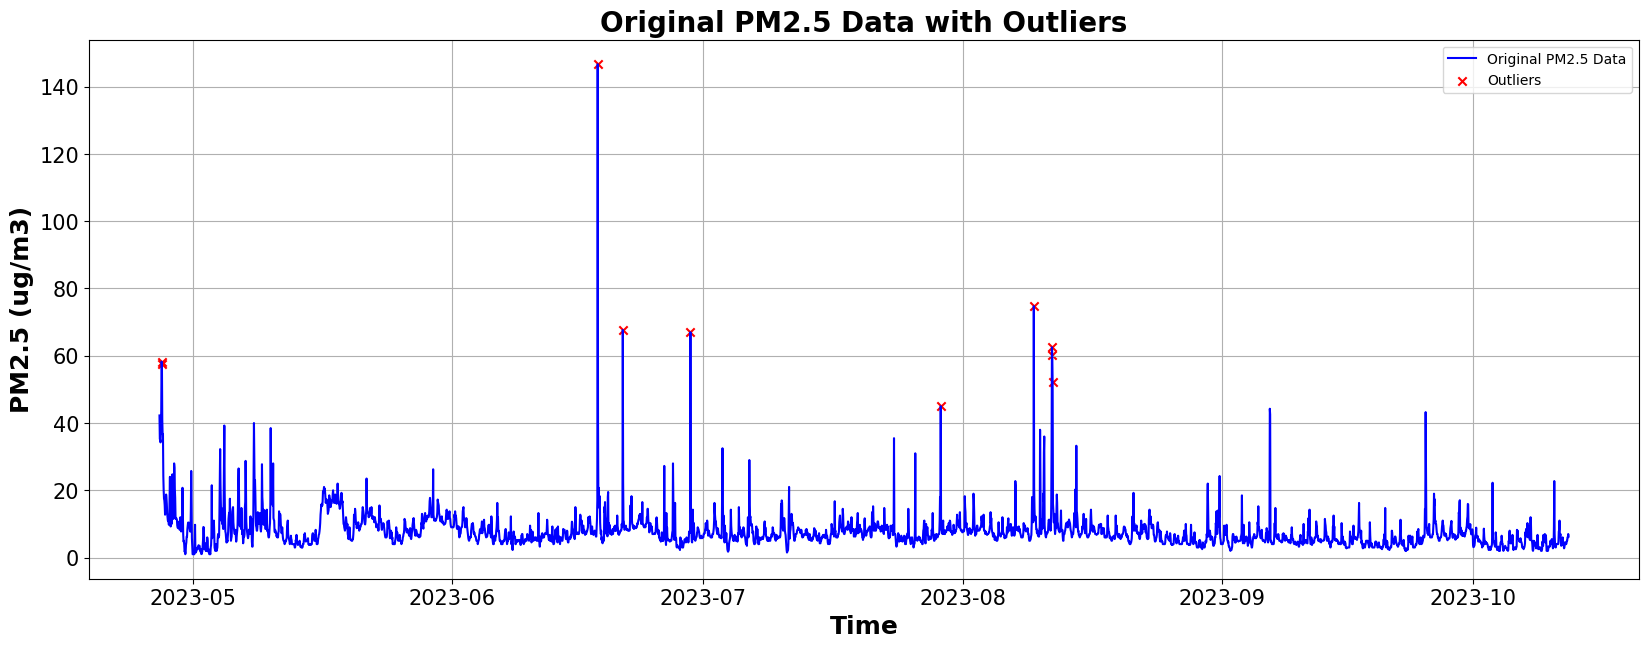

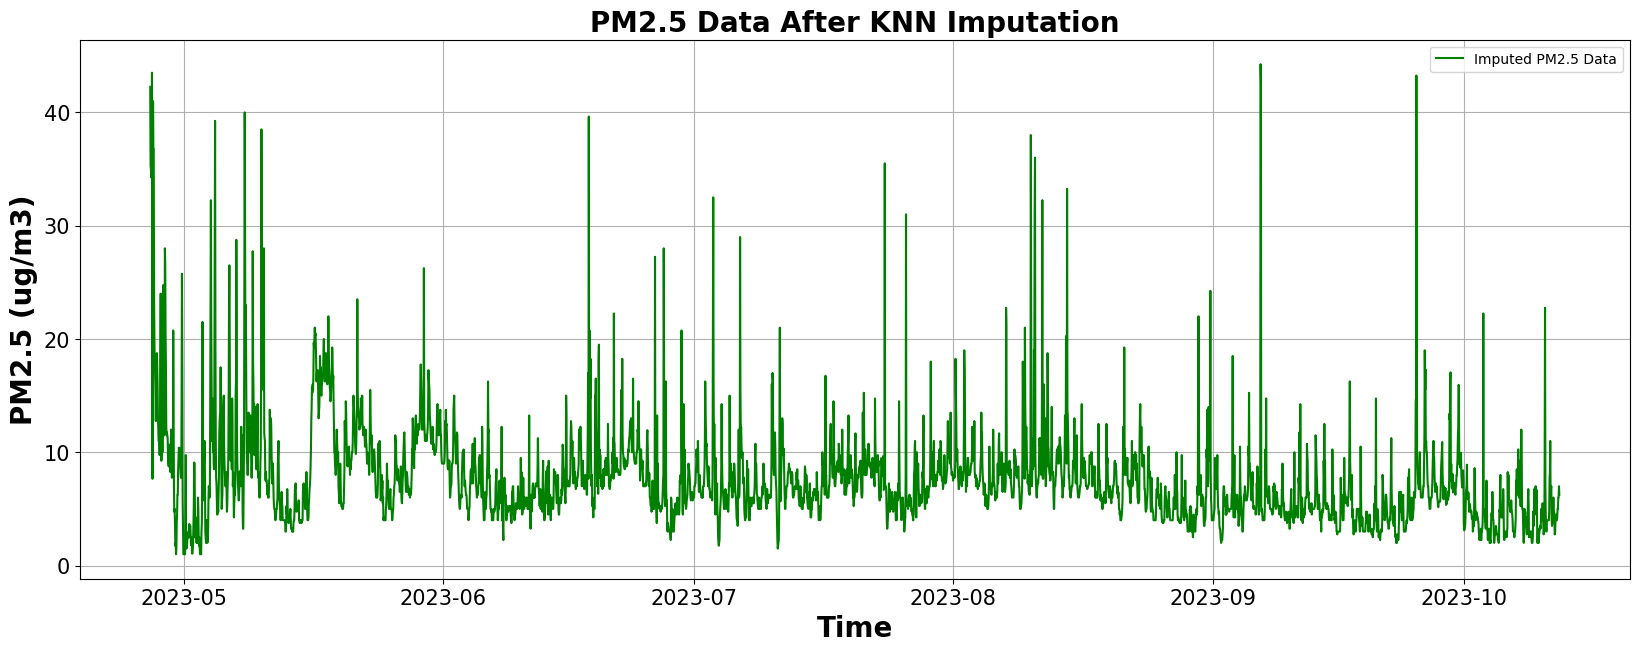

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Define the PM2.5 column
pm25_column = "PM2.5 (ug/m3)"

# Prepare data for KNN outlier detection
values = df[[pm25_column]].values

# Fit KNN model for outlier detection
k_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(values)
distances, indices = nbrs.kneighbors(values)

# Calculate mean distance to k-nearest neighbors
distances_mean = distances.mean(axis=1)

# Set threshold for outlier detection
threshold = 1
outlier_index = (np.abs(distances_mean - distances_mean.mean()) / distances_mean.std() > threshold)

# Identify outlier timestamps and values
outlier_timestamps = df.index[outlier_index]
outlier_values = df.loc[outlier_timestamps, pm25_column]

# Create a copy of the dataset and replace outliers with NaN
df_impute = df.copy()
df_impute.loc[outlier_timestamps, pm25_column] = np.nan

# Apply KNN Imputer to fill NaN values
knn_imputer = KNNImputer(n_neighbors=k_neighbors)
df_impute[pm25_column] = knn_imputer.fit_transform(df_impute[[pm25_column]])

# Plot the original data with outliers
plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="blue", label="Original PM2.5 Data")
plt.scatter(outlier_timestamps, outlier_values, color="red", label="Outliers", marker='x')
plt.title("Original PM2.5 Data with Outliers",fontsize=20,weight='bold')
plt.xlabel("Time",fontsize=18,weight='bold')
plt.ylabel("PM2.5 (ug/m3)",fontsize=18,weight='bold')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

# Plot the imputed data only
plt.figure(figsize=(20, 7))
plt.plot(df_impute.index, df_impute[pm25_column], color="green", label="Imputed PM2.5 Data")
plt.title("PM2.5 Data After KNN Imputation",fontsize=20,weight='bold')
plt.xlabel("Time",fontsize=20,weight='bold')
plt.ylabel("PM2.5 (ug/m3)",fontsize=20,weight='bold')
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


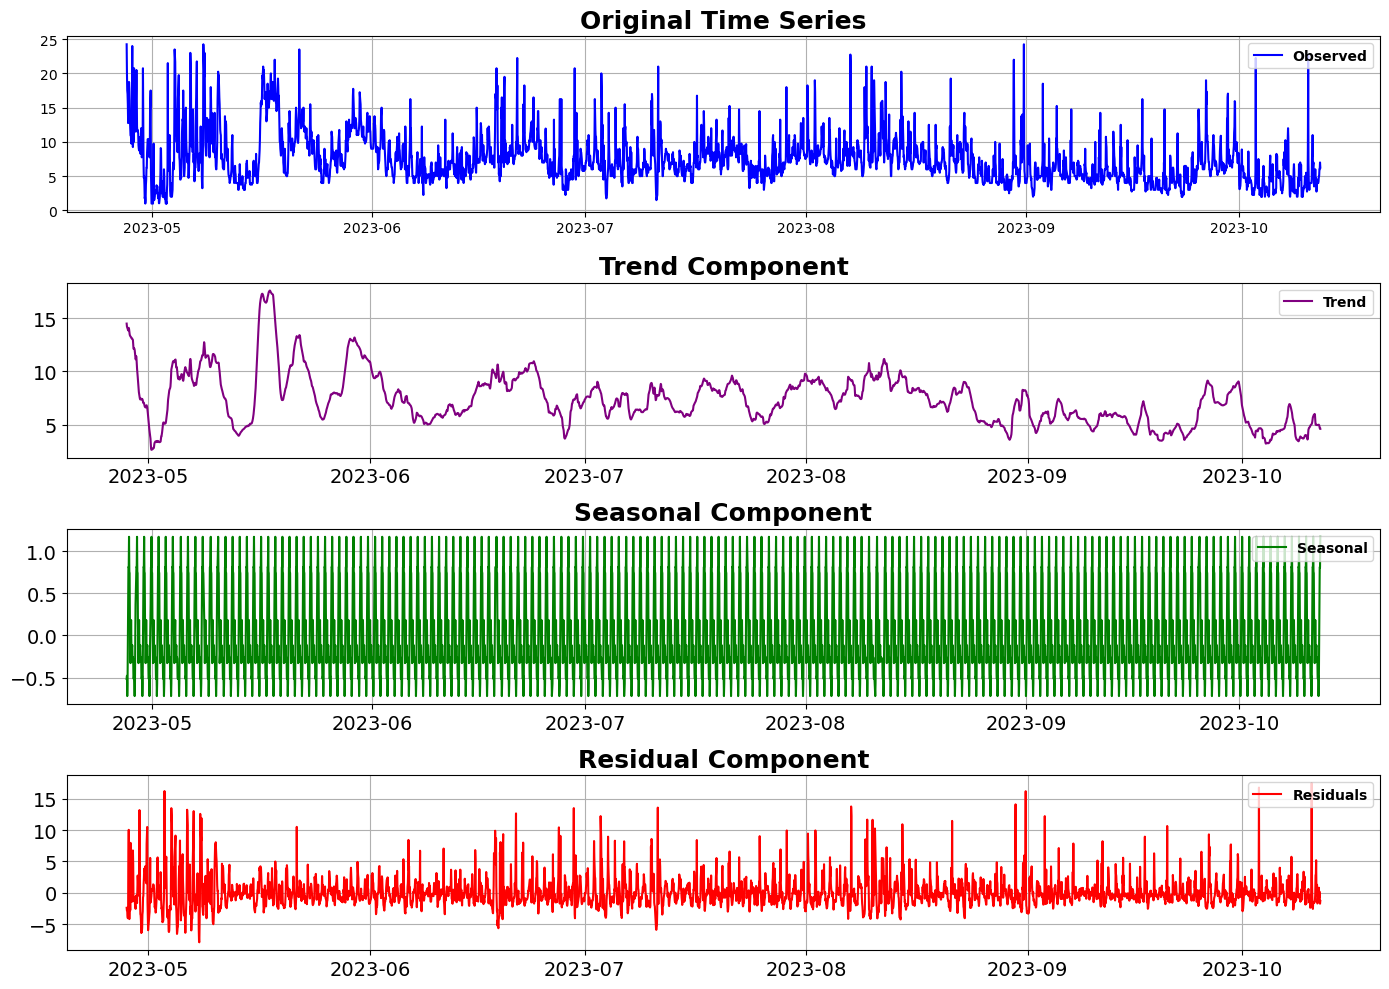

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('PM2.5_Jaffna_Cleaned.csv')

# Ensure the timestamp column is in datetime format and set it as the index
data['timestamp_index'] = pd.to_datetime(data['timestamp_index'])
data.set_index('timestamp_index', inplace=True)

# Choose the PM2.5 column for decomposition (replace 'PM2.5' with the actual column name)
data['PM2.5 (ug/m3)'] = pd.to_numeric(data['PM2.5 (ug/m3)'], errors='coerce')  # Ensure numeric values

# Drop rows with missing values in the selected column
data = data.dropna(subset=['PM2.5 (ug/m3)'])

# Perform seasonal decomposition (adjust 'period' if needed for hourly data)
decomposition = seasonal_decompose(data['PM2.5 (ug/m3)'], model='additive', period=24)  # 24 for hourly data (daily cycle)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(14, 10))

# Original data
plt.subplot(4, 1, 1)
plt.plot(data['PM2.5 (ug/m3)'], color='blue', label='Observed')
plt.legend(loc='upper right', prop={'weight': 'bold'})
plt.title('Original Time Series',fontsize=18,weight='bold')
plt.grid()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(trend, color='purple', label='Trend')
plt.legend(loc='upper right', prop={'weight': 'bold'})
plt.title('Trend Component',fontsize=18,weight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.grid()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(seasonal, color='green', label='Seasonal')
plt.legend(loc='upper right', prop={'weight': 'bold'})
plt.title('Seasonal Component',fontsize=18,weight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.grid()

# Residuals component
plt.subplot(4, 1, 4)
plt.plot(residual, color='red', label='Residuals')
plt.legend(loc='upper right', prop={'weight': 'bold'})
plt.title('Residual Component',fontsize=18,weight='bold')
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.grid()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load the dataset
df = pd.read_csv('31_Jaffna_hourly_cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Define the PM2.5 column
pm25_column = "PM2.5 (ug/m3)"

# Prepare data for KNN outlier detection
values = df[[pm25_column]].values

# Fit KNN model for outlier detection
k_neighbors = 5
nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(values)
distances, indices = nbrs.kneighbors(values)

# Calculate mean distance to k-nearest neighbors
distances_mean = distances.mean(axis=1)

# Set threshold for outlier detection
threshold = 2
outlier_index = (np.abs(distances_mean - distances_mean.mean()) / distances_mean.std() > threshold)

# Identify outlier timestamps and values
outlier_timestamps = df.index[outlier_index]
outlier_values = df.loc[outlier_timestamps, pm25_column]

# Create a copy of the dataset and replace outliers with NaN
df_impute = df.copy()
df_impute.loc[outlier_timestamps, pm25_column] = np.nan

# Impute missing values (outliers) using interpolation
df_impute[pm25_column] = df_impute[pm25_column].interpolate(method='linear')

# Plot the original data with outliers
plt.figure(figsize=(20, 7))
plt.plot(df.index, df[pm25_column], color="blue", label="Original PM2.5 Data")
plt.scatter(outlier_timestamps, outlier_values, color="red", label="Outliers", marker='x')
plt.title("Original PM2.5 Data with Outliers")
plt.xlabel("Time")
plt.ylabel("PM2.5 (ug/m3)")
plt.legend()
plt.grid(True)
plt.show()

# Plot the imputed data
plt.figure(figsize=(20, 7))
plt.plot(df_impute.index, df_impute[pm25_column], color="green", label="Imputed PM2.5 Data")
plt.title("PM2.5 Data After Interpolation Imputation")
plt.xlabel("Time")
plt.ylabel("PM2.5 (ug/m3)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16920\806907224.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data = data.resample('H').mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_16920\806907224.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # or use method='bfill' for backward fill


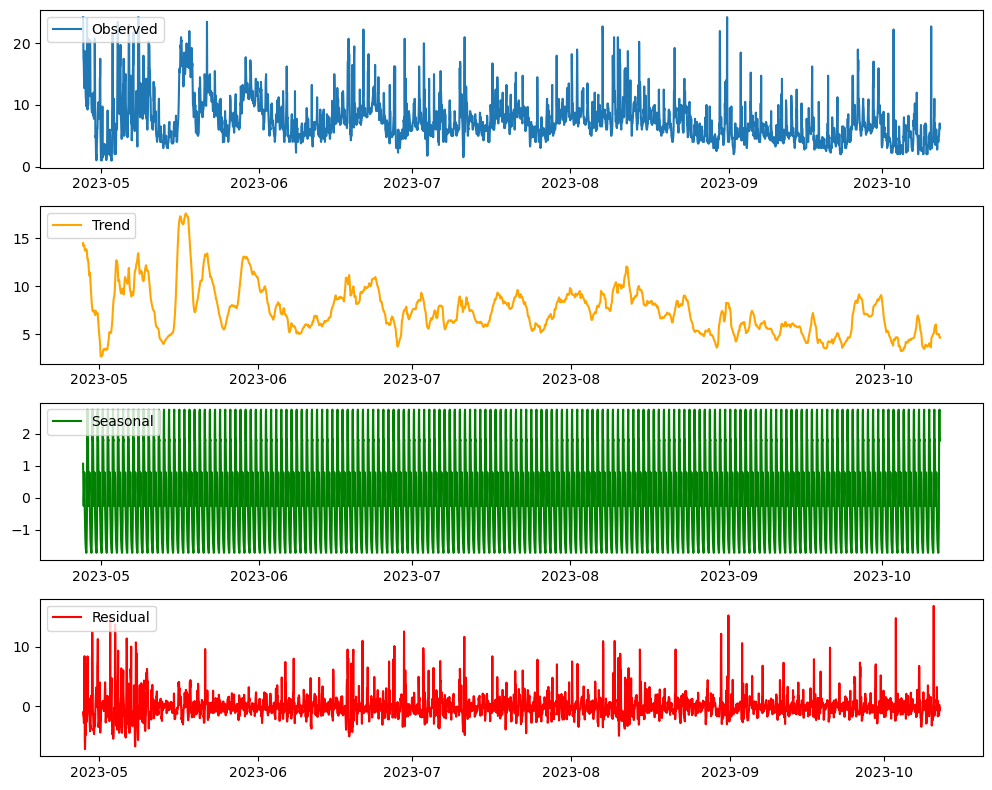

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your PM2.5 dataset (replace 'pm25_dataset.csv' with your file path)
# Ensure the dataset has a DateTime index and a column named 'PM2.5'
data = pd.read_csv('PM2.5_Jaffna_Cleaned.csv', parse_dates=['timestamp_index'], index_col='timestamp_index')

# Resample data to hourly frequency (if not already)
data = data.resample('H').mean()

# Handle missing values by forward filling or backward filling (choose one)
data = data.fillna(method='ffill')  # or use method='bfill' for backward fill

# Alternatively, drop rows with missing values:
# data = data.dropna()

# Perform seasonal decomposition
result = seasonal_decompose(data['PM2.5 (ug/m3)'], model='additive', period=24)  # Period=24 for daily seasonality

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
